<center><h1> Final Assignment: <h1/><center/>

<center><h2>Finding the Perfect Location for Your (Hospitality) Business<h2/>

<h3> 1. Introduction <h3/>
<hr>

For businesses in the hospitaltity industry the right location constitutes a critical factor of success. Depending on the type of establishment, its price class, and target crowd, ideal locations may vary considerably. Finding the optimal neighborhood to set up one's venue, however, is often less than intutitive, and backing one's assumptions with valuable data may help to prevent one or the other costly mistake. Moving on to some even greater news, this process may only take a few minutes, thanks to these few pre-written lines of code.

This application can help businesses find the perfect neighborhood for their next restaurant, bar, or hotel, as suggested by a highly customizable machine learning algorithm which takes cultural as well as economic factors for each neighborhood individually into account. One can simply input the neighborhood of an existing successful venue (whether owned personally or not), and will be given a colored, choropleth map of optimal neighborhoods in the cities of choice, along with a list of venue categories that are popular in that particular, and respective similar neighborhoods. 

<h3> 2. Business Case <h3/>
<hr>

A chef from New York owns a trendy upscale restaurant in the city's Upper East Side. Next to the fantastic food and service, the owner attributes the restaurant's prime location to be one of the top drivers of their success. 

Following the New York location, the chef is planning an expansion into other major US cities, in particular Chicago and San Francisco. Before the chef starts looking for specific locations in those cities, they want to know which neighborhoods in these cities are most similar to New York's Upper East Side, both culturally and economically. This will guarantee the highest chances of success for the expansion. 


<h3>3. Data <h3/>
<hr>

The first data requirement is a list of all neighborhoods in the cities of Chicago and San Francisco, as well as our Manhattan neighborhood, the Upper East Side. 

The Chicago data is published directly by the City of Chicago and available through the following link: <br>
CSV file: https://data.cityofchicago.org/api/views/y6yq-dbs2/rows.csv?accessType=DOWNLOAD <br>
All formats: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9

The San Francisco data is published directly by the City of San Francisco and available through the following link: <br>
CSV file: https://data.sfgov.org/api/views/6ia5-2f8k/rows.csv?accessType=DOWNLOAD <br>
All formats: https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4

The New York data is published by New York University and available through the following link: <br>
GeoJSON file: https://geo.nyu.edu/catalog/nyu-2451-34572 <br>

The Chicago and San Francisco data are CSV files, which can be easily read onto a pandas dataframe. 

Let's import Pandas and take a look at them:

In [45]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

print('Libraries imported.')

Libraries imported.


The Chicago dataset contains the variables 'the_geom', 'PRI_NEIGH' which is our variable of interest, 'SEC_NEIGH',  'SHAPE_AREA', and 'SHAPE_LEN' and has a total of 98 rows, one for each neighborhood. 

In [46]:
Chicago_neighborhoods_df=pd.read_csv('Chicago_Neighborhoods.csv')
Chicago_neighborhoods_df.head()

the_geom           PRI_NEIGH  \
0  MULTIPOLYGON (((-87.60670812560372 41.81681377...     Grand Boulevard   
1  MULTIPOLYGON (((-87.62760697485348 41.87437097...        Printers Row   
2  MULTIPOLYGON (((-87.66706868914602 41.88885187...       United Center   
3  MULTIPOLYGON (((-87.65833494805533 41.92166144...  Sheffield & DePaul   
4  MULTIPOLYGON (((-87.74059567509266 41.88782316...       Humboldt Park   

            SEC_NEIGH    SHAPE_AREA     SHAPE_LEN  
0         BRONZEVILLE  4.849250e+07  28196.837157  
1        PRINTERS ROW  2.162138e+06   6864.247156  
2       UNITED CENTER  3.252051e+07  23101.363745  
3  SHEFFIELD & DEPAUL  1.048259e+07  13227.049745  
4       HUMBOLDT PARK  1.250104e+08  46126.751351

In [47]:
Chicago_neighborhoods_df.shape

(98, 5)


The San Francisco dataset contains the variables 'LINK', 'the_geom', and 'name' which is our variable of interest, and has 117 rows, one for each neighborhood. 

In [225]:
SanFrancisco_neighborhoods_df=pd.read_csv('SFFind_Neighborhoods.csv')
SanFrancisco_neighborhoods_df.head()

LINK  \
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...   
1                                                NaN   
2                  http://www.nps.gov/prsf/index.htm   
3                                                NaN   
4  http://www.sfgate.com/neighborhoods/sf/innerri...   

                                            the_geom                    name  
0  MULTIPOLYGON (((-122.49345526799993 37.7835181...                Seacliff  
1  MULTIPOLYGON (((-122.48715071499993 37.7837854...             Lake Street  
2  MULTIPOLYGON (((-122.47758017099994 37.8109931...  Presidio National Park  
3  MULTIPOLYGON (((-122.47241052999993 37.7873465...        Presidio Terrace  
4  MULTIPOLYGON (((-122.47262578999994 37.7863148...          Inner Richmond

In [226]:
SanFrancisco_neighborhoods_df.shape

(117, 3)

The New York data is a GeoJSON file, from which we can find the neighborhood name under 'features.properties.name' and our geospatial coordinates under 'features.geometry.coordinates'.

In [50]:
with open('nyu-2451-34572-geojson.json') as json_data:
    newyork_data=json.load(json_data)
    
neighborhood_data=newyork_data['features']
neighborhood_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In order to compare our neighborhoods on a cultural dimension, we will extract data from the Foursquare Places API, in particular, the search endpoint in the venues group. Foursquare is a location data platform and provides a variety of tools for developers. The company describes its Places API as follows: 

"The Places API offers real-time access to Foursquare’s global database of rich venue data and user content to power your location-based experiences in your app or website."

To find out more, please check: https://developer.foursquare.com/places


To account for the economic dimension, we will use data on US postal codes and their respective median income, provided by the Michigan Population Studies Center, which is an interdisciplinary community of scholars in population research and training. The Michigan Population Studies Center belongs to the University of Michigan's Institute for Social Research (ISR).

The dataset can be found on the following link: https://www.psc.isr.umich.edu/dis/census/Features/tract2zip/

The CSV file has four columns: 'Zip' for ZIP code, 'Median' for median income, 'Mean' for mean income, and 'Pop' for population. In total. the file has information on 32,634 postal codes in the United States. 

In [51]:
zip_income_df=pd.read_csv('MedianZIP.csv')
zip_income_df.head()

Zip  Median    Mean     Pop
0  1001  56,663  66,688  16,445
1  1002  49,853  75,063  28,069
2  1003  28,462  35,121   8,491
3  1005  75,423  82,442   4,798
4  1007  79,076  85,802  12,962

In [52]:
zip_income_df.shape

(32634, 4)

In order to map our results using a choropleth map, we need a GeoJSON file for Chicago and San Francisco. 

The GeoJSON file of Chicago neighborhoods is provided by the City of Chicago and can be downloaded here: 
https://data.cityofchicago.org/api/geospatial/bbvz-uum9?method=export&format=GeoJSON 

The GeoJSON file of San Francisco neighborhoods is provided by the City of San Francisco and can be downloaded here: 
https://data.sfgov.org/api/geospatial/pty2-tcw4?method=export&format=GeoJSON 

For the Chicago neighborhoods, the key (neighborhood name) can be found under 'features.properties.pri_neigh' and for the San Francisco neighborhoods, the key can be found under 'features.properties.name'.

In [53]:
import json
with open('cbn.geojson') as f:
    chicago_boundaries=json.load(f)

for feature in chicago_boundaries['features']:
   print(feature['properties'])

{'pri_neigh': 'Grand Boulevard', 'sec_neigh': 'BRONZEVILLE', 'shape_area': '48492503.1554', 'shape_len': '28196.837157'}
{'pri_neigh': 'Printers Row', 'sec_neigh': 'PRINTERS ROW', 'shape_area': '2162137.97139', 'shape_len': '6864.247156'}
{'pri_neigh': 'United Center', 'sec_neigh': 'UNITED CENTER', 'shape_area': '32520512.7053', 'shape_len': '23101.363745'}
{'pri_neigh': 'Sheffield & DePaul', 'sec_neigh': 'SHEFFIELD & DEPAUL', 'shape_area': '10482592.2987', 'shape_len': '13227.049745'}
{'pri_neigh': 'Humboldt Park', 'sec_neigh': 'HUMBOLDT PARK', 'shape_area': '125010425.593', 'shape_len': '46126.751351'}
{'pri_neigh': 'Garfield Park', 'sec_neigh': 'GARFIELD PARK', 'shape_area': '89976069.5947', 'shape_len': '44460.91922'}
{'pri_neigh': 'North Lawndale', 'sec_neigh': 'NORTH LAWNDALE', 'shape_area': '89487422.0244', 'shape_len': '44959.459663'}
{'pri_neigh': 'Little Village', 'sec_neigh': 'LITTLE VILLAGE', 'shape_area': '127998297.819', 'shape_len': '49904.04003'}
{'pri_neigh': 'Armour S

In [54]:
with open('SF.geojson') as f2:
    sf_boundaries=json.load(f2)

sf_boundaries['features'][0]
for feature in sf_boundaries['features']:
   print(feature['properties'])

{'link': 'http://en.wikipedia.org/wiki/Sea_Cliff,_San_Francisco,_California', 'name': 'Seacliff'}
{'link': None, 'name': 'Lake Street'}
{'link': 'http://www.nps.gov/prsf/index.htm', 'name': 'Presidio National Park'}
{'link': None, 'name': 'Presidio Terrace'}
{'link': 'http://www.sfgate.com/neighborhoods/sf/innerrichmond/', 'name': 'Inner Richmond'}
{'link': None, 'name': 'Sutro Heights'}
{'link': None, 'name': 'Lincoln Park / Ft. Miley'}
{'link': 'http://www.sfgate.com/neighborhoods/sf/outerrichmond/', 'name': 'Outer Richmond'}
{'link': 'http://www.sfgate.com/neighborhoods/sf/goldengatepark/', 'name': 'Golden Gate Park'}
{'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Presidio_Heights', 'name': 'Presidio Heights'}
{'link': None, 'name': 'Laurel Heights / Jordan Park'}
{'link': 'http://en.wikipedia.org/wiki/Lone_Mountain,_San_Francisco,_California', 'name': 'Lone Mountain'}
{'link': 'http://en.wikipedia.org/wiki/Anza_Vista,_San_Francisco', 'name': 'Anza Vista'}
{'l

<h3> Methodology <h3/>
<hr>

Let's first import all the libraries needed

In [55]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#folium for creating Maps
!pip install folium 
import folium # map rendering library

#yellowbrick for determining the number of K clusters
!pip install yellowbrick
import yellowbrick

#install googlemaps to get location data
!pip install -U googlemaps

!pip install -U imbalanced-learn

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Requirement already up-to-date: googlemaps in /Users/theosalis/opt/anaconda3/lib/python3.7/site-packages (4.4.2)
Requirement already up-to-date: imbalanced-learn in /Users/theosalis/opt/anaconda3/lib/python3.7/site-packages (0.7.0)
Libraries imported.


<br>
<br>
In order to find out which neighbordhoods in Chicago and San Francisco are most similar to New York's Upper East Side, we must perform a cluster analysis (K-Means Clustering). The problem we have falls within the branch of unsupervised machine learning, meaning that we will be dealing with unlabeled data. <br>
<br>
A first cluster analysis will be based on cultural similarities between neighborhoods. The search endpoint from the venues group in the Foursquare Places API will return a JSON file of popular venues and their respective categories in each of our neighborhoods. Venue categories can be things like Yoga Studio, Chinese Restaurant, Coffee Shop, or Gym. We extract the info on the venue category and the neighborhood, and place it into a pandas dataframe. For the K-Means clustering we first calculate the mean frequencies of each venue category in a particular neighborhood, compute a measure of similarity (dissimilarity) of the neighborhood to each of the K cluster centers (centroids), and then assign it to the centroid closest to it. Recalculating the K centroids based on the mean of data points within that cluster and reallocating data points based on distance for a specified number of times will lead to the algorithm giving us a total of K different clusters that have maximum similarity within themselves, but maximum dissimilarity among each other. This means that single clusters will have a similar amount of for example coffee shops, bars, or restaurants of diverse cuisines. <br>
<br>
The data we feed into the Places API is a dataframe that lists our neighborhoods in the cities of Chicago and San Francisco, as well as our Manhattan neighborhood, the Upper East Side, along with their latitude and longitude values. 
Let's go ahead and create this. 

We first isolate the Chicago neighborhoods into a single dataframe.

In [56]:
Chicago_neighborhoods_df=Chicago_neighborhoods_df[['PRI_NEIGH']]
Chicago_neighborhoods_df.columns=['Neighborhood']
Chicago_neighborhoods_df.head()

Neighborhood
0     Grand Boulevard
1        Printers Row
2       United Center
3  Sheffield & DePaul
4       Humboldt Park

<br>
<br>
Next, we create a second dataframe which also contains the prefix 'Chicago', so that we can distinguish our Chicago neighborhoods from neighborhoods in other cities. This is also necessary for requesting the geospatial coordinates later on through the Google Maps API.

In [57]:
Chicago_df='Chicago - '+Chicago_neighborhoods_df
Chicago_df.head()

Neighborhood
0     Chicago - Grand Boulevard
1        Chicago - Printers Row
2       Chicago - United Center
3  Chicago - Sheffield & DePaul
4       Chicago - Humboldt Park

<br>
<br>
Let's repeat this for our San Francisco data. 

In [227]:
SanFrancisco_neighborhoods_df=SanFrancisco_neighborhoods_df[['name']]
SanFrancisco_neighborhoods_df.columns=['Neighborhood']
SanFrancisco_neighborhoods_df

Neighborhood
0                        Seacliff
1                     Lake Street
2          Presidio National Park
3                Presidio Terrace
4                  Inner Richmond
5                   Sutro Heights
6        Lincoln Park / Ft. Miley
7                  Outer Richmond
8                Golden Gate Park
9                Presidio Heights
10   Laurel Heights / Jordan Park
11                  Lone Mountain
12                     Anza Vista
13                     Cow Hollow
14                   Union Street
15                       Nob Hill
16                         Marina
17                 Telegraph Hill
18        Downtown / Union Square
19                     Tenderloin
20                   Civic Center
21                   Hayes Valley
22                   Alamo Square
23                      Panhandle
24                 Haight Ashbury
25                   Lower Haight
26                      Mint Hill
27                Duboce Triangle
28                    Cole Valley
29                    Rincon Hill
30                    South Beach
31                South of Market
32               Showplace Square
33                    Mission Bay
34             Yerba Buena Island
35                Treasure Island
36                Mission Dolores
37                         Castro
38                   Outer Sunset
39                       Parkside
40                     Stonestown
41                     Parkmerced
42                      Lakeshore
43            Golden Gate Heights
44                    Forest Hill
45                    West Portal
46              Clarendon Heights
47                Midtown Terrace
48                   Laguna Honda
49                 Lower Nob Hill
50                   Upper Market
51                Dolores Heights
52                        Mission
53                   Potrero Hill
54                       Dogpatch
55             Central Waterfront
56                Diamond Heights
57                 Crocker Amazon
58                      Fairmount
59                Peralta Heights
60                     Holly Park
61                   Merced Manor
62                 Balboa Terrace
63                      Ingleside
64                 Merced Heights
65                  Outer Mission
66             Ingleside Terraces
67             Mt. Davidson Manor
68               Monterey Heights
69             Westwood Highlands
70                  Westwood Park
71                  Miraloma Park
72                   McLaren Park
73                      Sunnydale
74              Visitacion Valley
75                    India Basin
76            Northern Waterfront
77                  Hunters Point
78          Candlestick Point SRA
79                         Cayuga
80                      Oceanview
81                   Apparel City
82                 Bernal Heights
83                     Noe Valley
84                 Produce Market
85                        Bayview
86                 Silver Terrace
87                     Bret Harte
88               Little Hollywood
89                      Excelsior
90                        Portola
91               University Mound
92                 St. Marys Park
93                Mission Terrace
94                      Sunnyside
95                      Glen Park
96               Western Addition
97       Aquatic Park / Ft. Mason
98               Fishermans Wharf
99                 Cathedral Hill
100                     Japantown
101               Pacific Heights
102         Lower Pacific Heights
103                     Chinatown
104                    Polk Gulch
105                   North Beach
106                  Russian Hill
107            Financial District
108                  Inner Sunset
109             Parnassus Heights
110                 Forest Knolls
111                   Buena Vista
112                Corona Heights
113               Ashbury Heights
114                 Eureka Valley
115              St. Francis Wood
116               Sherwood Forest

<br>
<br>
Looking at this data, we can see that some cells combine two neighborhoods with a slash ("/") symbol (e.g. index 6: Lincoln Park/ Ft. Miley). The same is the case for the San Francisco GeoJSON file we will be using to color our choropleth map later on. In order to get the geospatial coordinates from the Google Maps API without returning a None value, we must seperate these for now though. We do that in an additional dataframe, as we will also need the above dataframe for assigning clusters to the neighborhoods on our GeoJSON file later on.

In [59]:
SanFrancisco_neighborhoods_df_2=SanFrancisco_neighborhoods_df
for index in range(0,len(SanFrancisco_neighborhoods_df.index.values)):
    neighborhood_list=SanFrancisco_neighborhoods_df.iloc[index,0].split('/')
    #print(neighborhood_list)
    SanFrancisco_neighborhoods_df_2.iloc[index,0]=neighborhood_list[0]
    if len(neighborhood_list)>1:
        #print(neighborhood_list[-1])
        SanFrancisco_neighborhoods_df_2.loc[len(SanFrancisco_neighborhoods_df_2.index),'Neighborhood']=neighborhood_list[-1]
SanFrancisco_neighborhoods_df_2

Neighborhood
0                  Seacliff
1               Lake Street
2    Presidio National Park
3          Presidio Terrace
4            Inner Richmond
5             Sutro Heights
6             Lincoln Park 
7            Outer Richmond
8          Golden Gate Park
9          Presidio Heights
10          Laurel Heights 
11            Lone Mountain
12               Anza Vista
13               Cow Hollow
14             Union Street
15                 Nob Hill
16                   Marina
17           Telegraph Hill
18                Downtown 
19               Tenderloin
20             Civic Center
21             Hayes Valley
22             Alamo Square
23                Panhandle
24           Haight Ashbury
25             Lower Haight
26                Mint Hill
27          Duboce Triangle
28              Cole Valley
29              Rincon Hill
30              South Beach
31          South of Market
32         Showplace Square
33              Mission Bay
34       Yerba Buena Island
35          Treasure Island
36          Mission Dolores
37                   Castro
38             Outer Sunset
39                 Parkside
40               Stonestown
41               Parkmerced
42                Lakeshore
43      Golden Gate Heights
44              Forest Hill
45              West Portal
46        Clarendon Heights
47          Midtown Terrace
48             Laguna Honda
49           Lower Nob Hill
50             Upper Market
51          Dolores Heights
52                  Mission
53             Potrero Hill
54                 Dogpatch
55       Central Waterfront
56          Diamond Heights
57           Crocker Amazon
58                Fairmount
59          Peralta Heights
60               Holly Park
61             Merced Manor
62           Balboa Terrace
63                Ingleside
64           Merced Heights
65            Outer Mission
66       Ingleside Terraces
67       Mt. Davidson Manor
68         Monterey Heights
69       Westwood Highlands
70            Westwood Park
71            Miraloma Park
72             McLaren Park
73                Sunnydale
74        Visitacion Valley
75              India Basin
76      Northern Waterfront
77            Hunters Point
78    Candlestick Point SRA
79                   Cayuga
80                Oceanview
81             Apparel City
82           Bernal Heights
83               Noe Valley
84           Produce Market
85                  Bayview
86           Silver Terrace
87               Bret Harte
88         Little Hollywood
89                Excelsior
90                  Portola
91         University Mound
92           St. Marys Park
93          Mission Terrace
94                Sunnyside
95                Glen Park
96         Western Addition
97            Aquatic Park 
98         Fishermans Wharf
99           Cathedral Hill
100               Japantown
101         Pacific Heights
102   Lower Pacific Heights
103               Chinatown
104              Polk Gulch
105             North Beach
106            Russian Hill
107      Financial District
108            Inner Sunset
109       Parnassus Heights
110           Forest Knolls
111             Buena Vista
112          Corona Heights
113         Ashbury Heights
114           Eureka Valley
115        St. Francis Wood
116         Sherwood Forest
117               Ft. Miley
118             Jordan Park
119            Union Square
120               Ft. Mason

In [60]:
SanFrancisco_df='San Francisco - '+SanFrancisco_neighborhoods_df_2
SanFrancisco_df.head()

Neighborhood
0                San Francisco - Seacliff
1             San Francisco - Lake Street
2  San Francisco - Presidio National Park
3        San Francisco - Presidio Terrace
4          San Francisco - Inner Richmond

Next, we need to create a dataframe which summarizes the latitude and longitude values for each of our neighborhoods in Chicago and San Francisco.

In [61]:
Chicago_latlng=pd.DataFrame(columns=['Neighborhood','Latitude','Longitude'])
Chicago_latlng

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude]
Index: []

In [62]:
SanFrancisco_latlng=pd.DataFrame(columns=['Neighborhood','Latitude','Longitude'])
SanFrancisco_latlng

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude]
Index: []

<br>
<br>
In order to fill these dataframes with values, we will use the Google Maps API. We must simply input the data from our Chicago_df and SanFrancisco_df and will be returned a JSON file of relevant location information, including the latitude and longitude values for each neighborhood.<br>
<br>
To use the Google Maps API, one must first create a Google Cloud account, then request an API key, input one's billing information (i.e. credit card; for verification purposes only, account will not be charged without notice), and allow access to the Google Maps API. 

To set up your own account, please visit: https://console.cloud.google.com/freetrial <br>

The endpoint of our URL is: 'https://maps.googleapis.com/maps/api/geocode/json'

In order to get our location data we must add two parameters, address or postal code, and our API key. We input those into a dictionary, and use the urlencode function to parse them. This will be the input for our get request. 

Our latitude and longitude data can be found under ['results'][0]['geometry']['location'] in the JSON file. 

To speed up the process, we define a function called extract_lat_lng.

In [63]:
api_key= 'Hidden for GitHub'

In [64]:
from urllib.parse import urlencode

In [65]:
def extract_lat_lng (address_or_postalcode, data_type='json'): 
    
    endpoint=f'https://maps.googleapis.com/maps/api/geocode/{data_type}'
    params={'address':address_or_postalcode,'key': api_key}
    urlparams=urlencode(params)
    url=f'{endpoint}?{urlparams}'
    r=requests.get(url)
    if r.status_code not in range(200,299):
        return{}
    latlng={}
    try:
        latlng=r.json()['results'][0]['geometry']['location']
    except:
        pass
    return [latlng.get('lat'),latlng.get('lng')]
   

Now, we are ready to run this function on each of our Chicago and San Francisco neighborhoods, and fill our Chicago_latlng and SanFrancisco_latlng dataframes with values.

In [66]:
for index in range(0,len(Chicago_df)):
    
    latlng=extract_lat_lng(Chicago_df.iloc[index,0])
    Chicago_latlng=Chicago_latlng.append({'Neighborhood':Chicago_df.iloc[index,0],
                                         'Latitude':latlng[0],
                                         'Longitude':latlng[1]},ignore_index=True)
    print(f'The coordinates of {Chicago_df.iloc[index,0]} are {latlng}.')

The coordinates of Chicago - Grand Boulevard are [41.8130785, -87.6178087].
The coordinates of Chicago - Printers Row are [41.87381999999999, -87.6291214].
The coordinates of Chicago - United Center are [41.8806908, -87.6741759].
The coordinates of Chicago - Sheffield & DePaul are [41.9271746, -87.65364269999999].
The coordinates of Chicago - Humboldt Park are [41.8990752, -87.721293].
The coordinates of Chicago - Garfield Park are [41.8810352, -87.70118459999999].
The coordinates of Chicago - North Lawndale are [41.8589782, -87.7152017].
The coordinates of Chicago - Little Village are [41.8445273, -87.7050446].
The coordinates of Chicago - Armour Square are [41.8407554, -87.63401859999999].
The coordinates of Chicago - Avalon Park are [41.7442016, -87.58557569999999].
The coordinates of Chicago - Burnside are [41.7281304, -87.5964182].
The coordinates of Chicago - Hermosa are [41.9207326, -87.7339993].
The coordinates of Chicago - Avondale are [41.9415011, -87.70250209999999].
The coo

In [67]:
for index in range(0,len(SanFrancisco_df.index.values)):
    
    latlng=extract_lat_lng(SanFrancisco_df.iloc[index,0])
    
    SanFrancisco_latlng=SanFrancisco_latlng.append({'Neighborhood':SanFrancisco_df.iloc[index,0],
                                                    'Latitude':latlng[0],
                                                    'Longitude':latlng[1]}, ignore_index=True)
    print(f'The geograpical coordinate of {SanFrancisco_df.iloc[index,0]} are {latlng}.')

The geograpical coordinate of San Francisco - Seacliff are [37.785941, -122.4907].
The geograpical coordinate of San Francisco - Lake Street are [37.7861969, -122.4755206].
The geograpical coordinate of San Francisco - Presidio National Park are [37.7944516, -122.4672649].
The geograpical coordinate of San Francisco - Presidio Terrace are [37.7882626, -122.460805].
The geograpical coordinate of San Francisco - Inner Richmond are [37.7809537, -122.4672558].
The geograpical coordinate of San Francisco - Sutro Heights are [37.7779665, -122.5104871].
The geograpical coordinate of San Francisco - Lincoln Park  are [37.782836, -122.5116181].
The geograpical coordinate of San Francisco - Outer Richmond are [37.77983950000001, -122.4901296].
The geograpical coordinate of San Francisco - Golden Gate Park are [37.7694208, -122.4862138].
The geograpical coordinate of San Francisco - Presidio Heights are [37.7889125, -122.4538009].
The geograpical coordinate of San Francisco - Laurel Heights  are 

In [68]:
Chicago_latlng.head()

Neighborhood   Latitude  Longitude
0     Chicago - Grand Boulevard  41.813079 -87.617809
1        Chicago - Printers Row  41.873820 -87.629121
2       Chicago - United Center  41.880691 -87.674176
3  Chicago - Sheffield & DePaul  41.927175 -87.653643
4       Chicago - Humboldt Park  41.899075 -87.721293

In [71]:
SanFrancisco_latlng.head()

Neighborhood   Latitude   Longitude
0                San Francisco - Seacliff  37.785941 -122.490700
1             San Francisco - Lake Street  37.786197 -122.475521
2  San Francisco - Presidio National Park  37.794452 -122.467265
3        San Francisco - Presidio Terrace  37.788263 -122.460805
4          San Francisco - Inner Richmond  37.780954 -122.467256

The New York neighborhood_data JSON file already contains the latitude and longitude values. Let's extract the values and put them in a dataframe.

In [72]:
#The next task is transforming this into a Pandas DataFrame
column_names=['Borough','Neighborhood','Latitude','Longitude']

neighborhoods=pd.DataFrame(columns=column_names)
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [73]:
for data in neighborhood_data:
    borough=data['properties']['borough']
    neighborhood=data['properties']['name']
    neighborhood_latlng=data['geometry']['coordinates']
    neighborhood_lat=neighborhood_latlng[1]
    neighborhood_lng=neighborhood_latlng[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough,
                                         'Neighborhood':neighborhood,
                                         'Latitude':neighborhood_lat,
                                         'Longitude':neighborhood_lng}, ignore_index=True)

In [74]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [75]:
neighborhoods.shape

(306, 4)

In [76]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Let's create a dataframe only for Manhattan.

In [77]:
NewYork_df=neighborhoods.loc[neighborhoods['Borough']=='Manhattan',:]
NewYork_df=NewYork_df.drop('Borough', axis=1).reset_index(drop=True)
NewYork_df['Neighborhood']='New York - '+NewYork_df['Neighborhood']
NewYork_df.head()

Neighborhood   Latitude  Longitude
0         New York - Marble Hill  40.876551 -73.910660
1           New York - Chinatown  40.715618 -73.994279
2  New York - Washington Heights  40.851903 -73.936900
3              New York - Inwood  40.867684 -73.921210
4    New York - Hamilton Heights  40.823604 -73.949688

The next step of our analysis is to map all neighborhoods in their respective cities, to make sure that our geospatial data is correct. 
We do this by using the folium module. <br>

We will create three maps which will be centered around the city centers

In [78]:
Chicago_coordinates=extract_lat_lng('Chicago')
SanFrancisco_coordinates=extract_lat_lng('San Francisco')
Manhattan_coordinates=extract_lat_lng('Manhattan,NY')

In [79]:
map_manhattan=folium.Map(location=Manhattan_coordinates, zoom_start=11)

#Add Markers to the Map

for lat, lng, label in zip(NewYork_df['Latitude'],NewYork_df['Longitude'],NewYork_df['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                        radius=4,
                       popup=label,
                       color='#8B0000',
                       fill=True,
                       fill_color='red',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_manhattan)
map_manhattan

In [80]:
map_chicago=folium.Map(location=Chicago_coordinates, zoom_start=11)

#Add Markers to the Map

for lat, lng, label in zip(Chicago_latlng['Latitude'],Chicago_latlng['Longitude'],Chicago_latlng['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                        radius=4,
                       popup=label,
                       color='#8B0000',
                       fill=True,
                       fill_color='red',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_chicago)
map_chicago

In [262]:
map_sanfrancisco=folium.Map(location=SanFrancisco_coordinates, zoom_start=12)

#Add Markers to the Map

for lat, lng, label in zip(SanFrancisco_latlng['Latitude'],SanFrancisco_latlng['Longitude'],SanFrancisco_latlng['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                        radius=4,
                       popup=label,
                       color='#8B0000',
                       fill=True,
                       fill_color='red',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_sanfrancisco)
map_sanfrancisco

Please note that our San Francisco map is zoomed in closer than our New York City and our Chicago maps. Looking at the map we can see that San Francisco has a higher number of neighborhoods, and that most of them are smaller and closer to each other than our Chicago neighborhoods. <br>
<br>
Given that all coordinates look correct, we can proceed with our analysis.
<br>
<br>
From the Manhattan dataframe, we will extract the Upper East Side, given that it is our current restaurant's location.

In [82]:
Restaurant_location=NewYork_df.loc[(NewYork_df['Neighborhood']=='New York - Upper East Side'),: ].reset_index(drop=True)

In [83]:
Restaurant_location

Neighborhood   Latitude  Longitude
0  New York - Upper East Side  40.775639 -73.960508

<br>
<br>
We can now create the final dataframe to pass into the Places API. 

In [84]:
Combined_df=pd.concat([Restaurant_location,Chicago_latlng, SanFrancisco_latlng], axis=0).reset_index(drop=True)
Combined_df.head()

Neighborhood   Latitude  Longitude
0    New York - Upper East Side  40.775639 -73.960508
1     Chicago - Grand Boulevard  41.813079 -87.617809
2        Chicago - Printers Row  41.873820 -87.629121
3       Chicago - United Center  41.880691 -87.674176
4  Chicago - Sheffield & DePaul  41.927175 -87.653643

In [85]:
Combined_df.shape

(220, 3)

<br>
<br>
Let's define the our Foursquare credentials and version. The version is simply the access data, and the limit is the maximum number of venues returned per neighborhood.

In [86]:
#Defining Foursquare Credentials and Version

CLIENT_ID= 'Hidden for GitHub'
CLIENT_SECRET= 'Hidden for GitHub'
VERSION='20201129'
LIMIT=100

print('Your credentials were entered')
#print('Client_ID:',CLIENT_ID)
#print('Client_Secret:',CLIENT_SECRET)

Your credentials were entered


The following function will be used to collect the venues for each of our neighborhoods in the Combined_df dataframe.

In [87]:
def getNearbyVenues (names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng, in zip (names, latitudes, longitudes):
        print(name)
        
        #Create the API request URL
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        #Make the Get Request
        results=requests.get(url).json()['response']['groups'][0]['items']
        
        #Now, let's collect the relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
            
    nearby_venues= pd.DataFrame( item for venue_list in venues_list for item in venue_list)
        
    nearby_venues.columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
            
    return (nearby_venues)

In [88]:
Venues_df=getNearbyVenues(Combined_df['Neighborhood'],Combined_df['Latitude'],Combined_df['Longitude'])

New York - Upper East Side
Chicago - Grand Boulevard
Chicago - Printers Row
Chicago - United Center
Chicago - Sheffield & DePaul
Chicago - Humboldt Park
Chicago - Garfield Park
Chicago - North Lawndale
Chicago - Little Village
Chicago - Armour Square
Chicago - Avalon Park
Chicago - Burnside
Chicago - Hermosa
Chicago - Avondale
Chicago - Logan Square
Chicago - Calumet Heights
Chicago - East Side
Chicago - West Pullman
Chicago - Garfield Ridge
Chicago - New City
Chicago - Englewood
Chicago - Grand Crossing
Chicago - Ashburn
Chicago - Mount Greenwood
Chicago - Morgan Park
Chicago - O'Hare
Chicago - Jackson Park
Chicago - Loop
Chicago - Pullman
Chicago - Riverdale
Chicago - Hegewisch
Chicago - Greektown
Chicago - Douglas
Chicago - Museum Campus
Chicago - Edgewater
Chicago - Lake View
Chicago - Lincoln Park
Chicago - Magnificent Mile
Chicago - Lincoln Square
Chicago - Oakland
Chicago - Grant Park
Chicago - West Loop
Chicago - Fuller Park
Chicago - Andersonville
Chicago - Woodlawn
Chicago - 

<br>
<br>
We have a list of 7907 venues in total.

In [89]:
Venues_df.shape

(7907, 7)

In [90]:
Venues_df.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  New York - Upper East Side              40.775639              -73.960508   
1  New York - Upper East Side              40.775639              -73.960508   
2  New York - Upper East Side              40.775639              -73.960508   
3  New York - Upper East Side              40.775639              -73.960508   
4  New York - Upper East Side              40.775639              -73.960508   

                  Venue  Venue Latitude  Venue Longitude      Venue Category  
0  Lady M Cake Boutique       40.775619       -73.962186              Bakery  
1         Sant Ambroeus       40.775328       -73.962819  Italian Restaurant  
2    Dos Toros Taqueria       40.773950       -73.959668       Burrito Place  
3                 Aēsop       40.777584       -73.961499      Cosmetics Shop  
4        The Mark Hotel       40.775274       -73.963383               Hotel

<br>
<br>
We can now compute the number of venues in each neighborhood. Some neighborhoods will only count 1-5 popular venues. This is not an issue for our application, given that this means that the area has little to offer culturally, and will most likely group in different clusters from places like New York's Upper East Side, Chicago's Magnificent Mile, or San Francisco's Union Square.

In [93]:
grouped_venues_df=Venues_df[['Neighborhood','Venue Category']].groupby(['Neighborhood']).count().rename(columns={'Venue Category':'Venues Count'})
grouped_venues_df

Venues Count
Neighborhood                                        
Chicago - Albany Park                             28
Chicago - Andersonville                           48
Chicago - Archer Heights                          24
Chicago - Armour Square                           11
Chicago - Ashburn                                  8
Chicago - Auburn Gresham                           4
Chicago - Austin                                  11
Chicago - Avalon Park                             10
Chicago - Avondale                                38
Chicago - Belmont Cragin                          15
Chicago - Beverly                                 16
Chicago - Boystown                               100
Chicago - Bridgeport                              55
Chicago - Brighton Park                           19
Chicago - Bucktown                                32
Chicago - Burnside                                 4
Chicago - Calumet Heights                          1
Chicago - Chatham                                 11
Chicago - Chicago Lawn                             5
Chicago - Chinatown                               46
Chicago - Clearing                                17
Chicago - Douglas                                 32
Chicago - Dunning                                 22
Chicago - East Side                                7
Chicago - East Village                            66
Chicago - Edgewater                               45
Chicago - Edison Park                             20
Chicago - Englewood                                8
Chicago - Fuller Park                             11
Chicago - Gage Park                               15
Chicago - Galewood                                 1
Chicago - Garfield Park                           10
Chicago - Garfield Ridge                          17
Chicago - Gold Coast                              33
Chicago - Grand Boulevard                         27
Chicago - Grand Crossing                          10
Chicago - Grant Park                              19
Chicago - Greektown                               45
Chicago - Hegewisch                               10
Chicago - Hermosa                                 22
Chicago - Humboldt Park                            5
Chicago - Hyde Park                               42
Chicago - Irving Park                             25
Chicago - Jackson Park                            10
Chicago - Jefferson Park                          12
Chicago - Kenwood                                 21
Chicago - Lake View                               24
Chicago - Lincoln Park                            99
Chicago - Lincoln Square                          83
Chicago - Little Italy, UIC                       44
Chicago - Little Village                          25
Chicago - Logan Square                            22
Chicago - Loop                                   100
Chicago - Lower West Side                         21
Chicago - Magnificent Mile                       100
Chicago - Mckinley Park                           16
Chicago - Millenium Park                         100
Chicago - Montclare                                4
Chicago - Morgan Park                              3
Chicago - Mount Greenwood                         20
Chicago - Museum Campus                           59
Chicago - Near South Side                         33
Chicago - New City                                23
Chicago - North Center                            46
Chicago - North Lawndale                           5
Chicago - North Park                               3
Chicago - Norwood Park                             4
Chicago - O'Hare                                  11
Chicago - Oakland                                 11
Chicago - Old Town                                24
Chicago - Portage Park                            25
Chicago - Printers Row                           100
Chicago - Pullman                                  1
Chicago - River North                            100
Chicago - Ro

<br>
<br>
Visualizing our data in a histogram, we can see that the most common number of popular venues in a neighborhood is between 10 and 20, followed by 0-10. Only around 10% of all neighborhoods have more than 90 popular venues. Remember that we capped the maximum number at 100.

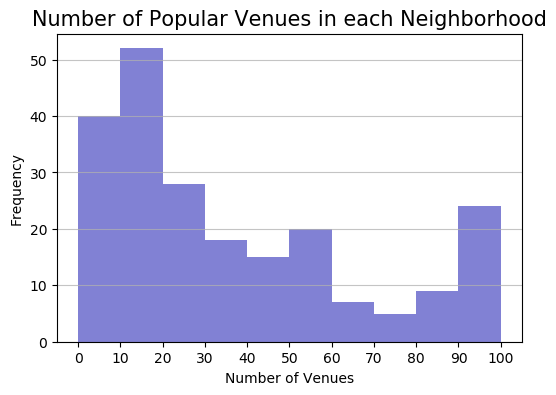

In [163]:
hist, bin_edges= np.histogram(grouped_venues_df[['Venues Count']], bins=range(0,101,10))

plt.figure(figsize=[6,4])

plt.hist(grouped_venues_df['Venues Count'],bin_edges, color='#0504aa',alpha=0.5)
plt.xlim(min(bin_edges-5), max(bin_edges+5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Venues',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.xticks(bin_edges,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Number of Popular Venues in each Neighborhood',fontsize=15)
plt.show()

<br>
<br>
Overall, our neighborhoods offer 415 unique venue categories.

In [164]:
print('There are {} unqiue categories'.format(len(set(Venues_df['Venue Category']))))

There are 415 unqiue categories


<br>
<br> 
In order to be able to cluster our neighborhoods depending on the similarity of their most popular venues, we must first transform our Venues_df such that each Venue Category becomes a dummy variable. We can later sum the number of venues belonging to a particular category for each neighborhood, compute their mean freuency and compare them. 

In [165]:
venues_onehot=pd.get_dummies(Venues_df['Venue Category'], prefix=' ',prefix_sep=' ' )
venues_onehot['Neighborhood']=Venues_df['Neighborhood']

#Let's make Neighborhood the first column:
fixed_columns=[venues_onehot.columns[-1]]+list(venues_onehot.columns[:-1])
venues_onehot=venues_onehot[fixed_columns]
venues_onehot.head()

Neighborhood    ATM    Acai House    Accessories Store  \
0  New York - Upper East Side      0             0                    0   
1  New York - Upper East Side      0             0                    0   
2  New York - Upper East Side      0             0                    0   
3  New York - Upper East Side      0             0                    0   
4  New York - Upper East Side      0             0                    0   

     Adult Boutique    Afghan Restaurant    African Restaurant  \
0                 0                    0                     0   
1                 0                    0                     0   
2                 0                    0                     0   
3                 0                    0                     0   
4                 0                    0                     0   

     Alternative Healer    American Restaurant    Amphitheater  \
0                     0                      0               0   
1                     0                      0               0   
2                     0                      0               0   
3                     0                      0               0   
4                     0                      0               0   

     Animal Shelter    Antique Shop    Aquarium    Arcade    Arepa Restaurant  \
0                 0               0           0         0                   0   
1                 0               0           0         0                   0   
2                 0               0           0         0                   0   
3                 0               0           0         0                   0   
4                 0               0           0         0                   0   

     Argentinian Restaurant    Art Gallery    Art Museum  \
0                         0              0             0   
1                         0              0             0   
2                         0              0             0   
3                         0              0             0   
4                         0              0             0   

     Arts & Crafts Store    Arts & Entertainment    Asian Restaurant  \
0                      0                       0                   0   
1                      0                       0                   0   
2                      0                       0                   0   
3                      0                       0                   0   
4                      0                       0                   0   

     Athletics & Sports    Auditorium    Austrian Restaurant    Auto Garage  \
0                     0             0                      0              0   
1                     0             0                      0              0   
2                     0             0                      0              0   
3                     0             0                      0              0   
4                     0             0                      0              0   

     Automotive Shop    BBQ Joint    Baby Store    Bagel Shop    Bakery  \
0                  0            0             0             0         1   
1                  0            0             0             0         0   
2                  0            0             0             0         0   
3                  0            0             0             0         0   
4                  0            0             0             0         0   

     Bank    Bar    Baseball Field    Baseball Stadium    Basketball Court  \
0       0      0                 0                   0                   0   
1       0      0                 0                   0                   0   
2       0      0                 0                   0                   0   
3       0      0                 0                   0                   0   
4       0      0                 0                   0                   0   

     Basketball Stadium    Bath House    Beach    Bed & Breakfast    Beer Bar  \
0              

Again, we have one row per venue, and each will have a cell with value 1 for only one dummy variable (venue category).

In [166]:
venues_onehot.shape

(7907, 416)

<br>
<br>
The following dataframe shows the mean frequencies of each venue category by neighborhood

In [167]:
venues_grouped=venues_onehot.groupby(['Neighborhood'],axis=0).mean().reset_index()
venues_grouped.head()

Neighborhood    ATM    Acai House    Accessories Store  \
0     Chicago - Albany Park    0.0           0.0                  0.0   
1   Chicago - Andersonville    0.0           0.0                  0.0   
2  Chicago - Archer Heights    0.0           0.0                  0.0   
3   Chicago - Armour Square    0.0           0.0                  0.0   
4         Chicago - Ashburn    0.0           0.0                  0.0   

     Adult Boutique    Afghan Restaurant    African Restaurant  \
0               0.0                  0.0                   0.0   
1               0.0                  0.0                   0.0   
2               0.0                  0.0                   0.0   
3               0.0                  0.0                   0.0   
4               0.0                  0.0                   0.0   

     Alternative Healer    American Restaurant    Amphitheater  \
0                   0.0                    0.0             0.0   
1                   0.0                    0.0             0.0   
2                   0.0                    0.0             0.0   
3                   0.0                    0.0             0.0   
4                   0.0                    0.0             0.0   

     Animal Shelter    Antique Shop    Aquarium    Arcade    Arepa Restaurant  \
0               0.0             0.0         0.0       0.0                 0.0   
1               0.0             0.0         0.0       0.0                 0.0   
2               0.0             0.0         0.0       0.0                 0.0   
3               0.0             0.0         0.0       0.0                 0.0   
4               0.0             0.0         0.0       0.0                 0.0   

     Argentinian Restaurant    Art Gallery    Art Museum  \
0                       0.0            0.0           0.0   
1                       0.0            0.0           0.0   
2                       0.0            0.0           0.0   
3                       0.0            0.0           0.0   
4                       0.0            0.0           0.0   

     Arts & Crafts Store    Arts & Entertainment    Asian Restaurant  \
0                    0.0                     0.0            0.000000   
1                    0.0                     0.0            0.000000   
2                    0.0                     0.0            0.000000   
3                    0.0                     0.0            0.090909   
4                    0.0                     0.0            0.000000   

     Athletics & Sports    Auditorium    Austrian Restaurant    Auto Garage  \
0                   0.0           0.0                    0.0            0.0   
1                   0.0           0.0                    0.0            0.0   
2                   0.0           0.0                    0.0            0.0   
3                   0.0           0.0                    0.0            0.0   
4                   0.0           0.0                    0.0            0.0   

     Automotive Shop    BBQ Joint    Baby Store    Bagel Shop    Bakery  \
0                0.0        0.000           0.0           0.0  0.000000   
1                0.0        0.000           0.0           0.0  0.062500   
2                0.0        0.000           0.0           0.0  0.083333   
3                0.0        0.000           0.0           0.0  0.000000   
4                0.0        0.125           0.0           0.0  0.000000   

       Bank       Bar    Baseball Field    Baseball Stadium  \
0  0.035714  0.000000               0.0                 0.0   
1  0.000000  0.000000               0.0                 0.0   
2  0.041667  0.083333               0.0                 0.0   
3  0.000000  0.000000               0.0                 0.0   
4  0.000000  0.125000               0.0                 0.0   

     Basketball Court    Basketball Stadium    Bath House    Beach  \
0                 0.0                   0.0           0.0      0.0   
1                 0.0                   0.0           0.

<br>
<br>
To later discover the composition of each cluster, we can define a function to extract the top 10 venues for each neighborhood. 

This requires us to first sort our dataframe by mean frequency, let's define a function for that. 

In [168]:
def return_most_common_venues(row, num_top_venues):
    row_categories=row.iloc[1:] #We drop the Neighborhood column for sorting
    row_categories_sorted=row_categories.sort_values(ascending=False) #We have a Series with the Venue Categories as Indices and order those by frequency 
    
    return row_categories_sorted.index.values[0: num_top_venues] #We return only the values of the top 10 indices 

In [177]:
num_top_venues= 10
indicators=['st','nd','rd']

#Creating the Columns
columns=['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#Creating a new DataFrame
#Setting the columns
venues_sorted=pd.DataFrame(columns=columns)
#Filling in the Neighborhood column
venues_sorted['Neighborhood']=venues_grouped['Neighborhood']
#Filling in the venue columnns; looping through all rows
for ind in np.arange(venues_grouped.shape[0]): 
    #Locating column and populating columns [1:-1]
    venues_sorted.iloc[ind,1:] = return_most_common_venues(venues_grouped.iloc[ind,:], num_top_venues)

venues_sorted.head()

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0     Chicago - Albany Park     Mexican Restaurant     Korean Restaurant   
1   Chicago - Andersonville                 Bakery           Coffee Shop   
2  Chicago - Archer Heights     Mexican Restaurant                Bakery   
3   Chicago - Armour Square     Chinese Restaurant         Grocery Store   
4         Chicago - Ashburn    Martial Arts School                   Bar   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place                   Bank            Hookah Bar   
1        Breakfast Spot             Shoe Store                Lounge   
2                   Bar          Grocery Store            Restaurant   
3    Italian Restaurant         Cosmetics Shop           Gas Station   
4             Nightclub    Fried Chicken Joint             BBQ Joint   

  6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
0       Thai Restaurant    Middle Eastern Restaurant        Sandwich Place   
1                  Café           Miscellaneous Shop           Yoga Studio   
2         Hot Dog Joint                        Hotel           Gas Station   
3        Sandwich Place             Asian Restaurant                  Café   
4        Cosmetics Shop           Mexican Restaurant    Light Rail Station   

   9th Most Common Venue  10th Most Common Venue  
0             Taco Place    Fast Food Restaurant  
1             Restaurant             Pizza Place  
2    Rental Car Location       Mobile Phone Shop  
3          Hot Dog Joint      Falafel Restaurant  
4            Fish Market                    Farm

<br>
<br>
At this point, we can run our first machine learning algorithm, the K-means clustering algorithm which will assign each of our neighborhoods to a specific cluster, based on similarity (dissimilarity).The aim of our K-means algorithm it to choose centroids that minimize the inertia, or the within-cluster sum-of-squares. 

There are different ways of determining the optimal number of clusters, each fitting the model with a range of values for K and computing a relevant metric. 

The Elbow method plots a line chart of the inertia (distortion score) against the range of K. Where the line chart resembles an arm, the "elbow" (i.e. the point of inflection on the curve) marks the appropriate number of K for the best-fit model. Using the KElbowVisualizer from the yellowbrick model will annotate the "elbow" with a dashed line. In this case, the system returns K=10 as the optimal number of clusters. However, our graph does not resemble an arm, suggesting that an alternative method for determenining the number of clusters may be appropriate. We choose a new metric, namely the "calinski harabasz score" to confirm that the optimal number K of clusters is equal to 10. 

Alternatively, one may also run a hierarchical cluster analysis first and choose the number of clusters based on where the biggest jump in cluster distance happens in the agglomeration matrix.



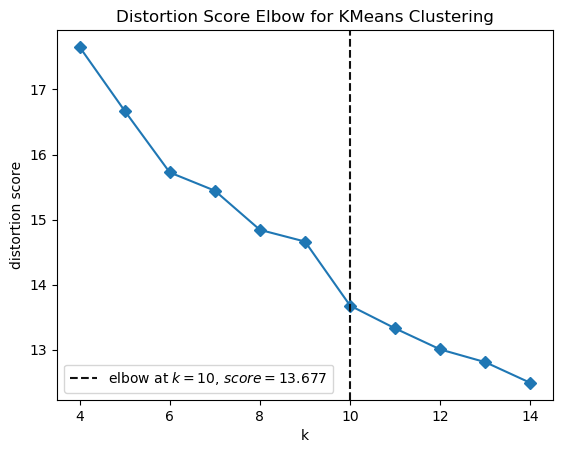

In [170]:
from yellowbrick.cluster import KElbowVisualizer

#Dropping the Neighborhood column for the Clustering
venues_grouped_clustering=venues_grouped.drop(['Neighborhood'],axis=1)

# Instantiate the clustering model and visualizer
# k is range of number of clusters.
model = KMeans(random_state=2)
visualizer = KElbowVisualizer(model, k=(4,15),  timings=False)

# Fit the data to the visualizer and render the figure
visualizer.fit(venues_grouped_clustering)        
visualizer.show()                           

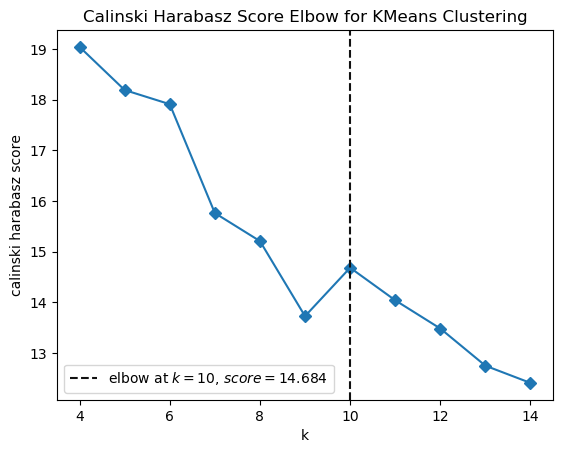

In [171]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=2)
visualizer = KElbowVisualizer(model, k=(4,15), metric='calinski_harabasz', timings=False)

# Fit the data to the visualizer and render the figure
visualizer.fit(venues_grouped_clustering)        
visualizer.show()        

In [178]:
#Defining the number of clusters
K_clusters=10

#Fitting the Clustering Algorithm 
kmeans=KMeans(n_clusters=K_clusters, random_state=0).fit(venues_grouped_clustering)

#Checking the labels
kmeans.labels_

array([9, 0, 9, 2, 9, 5, 0, 0, 0, 9, 0, 0, 0, 9, 0, 5, 7, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 5, 9, 3, 2, 0, 0, 2, 2, 2, 0, 2, 9, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 9, 0, 0, 9, 0, 9, 0, 0, 5, 0, 2, 0, 9, 0, 0, 5,
       5, 2, 5, 9, 0, 0, 1, 0, 9, 9, 0, 5, 0, 8, 2, 0, 0, 2, 0, 2, 2, 9,
       9, 0, 2, 2, 9, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 9, 2, 0, 2, 6, 0, 5,
       2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 5, 0, 2, 0, 0, 0, 0, 0, 2, 5, 0, 0,
       2, 4, 4, 0, 4, 5, 0, 0, 0, 6, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 4, 0,
       0, 0, 0, 0, 0, 5, 2, 2, 4, 0, 2, 0, 2, 0, 2, 4, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 4, 2, 0, 0, 0, 4, 4, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 4, 4, 5, 0, 0, 0, 0, 2],
      dtype=int32)

<br>
<br>
We can now extend our Combined_df which lists all neighborhoods along with their coordinates to include the cluster labels and most common venues of each neighborhood. This will allow us to compare differences between clusters.

In [179]:
#Merging Information into one DataFrame

#Add Cluster Labels to venues_sorted
venues_sorted.insert(0,'Cluster', kmeans.labels_)

venues_merged=Combined_df

venues_merged=venues_merged.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')
venues_merged.head()

Neighborhood   Latitude  Longitude  Cluster  \
0    New York - Upper East Side  40.775639 -73.960508      0.0   
1     Chicago - Grand Boulevard  41.813079 -87.617809      2.0   
2        Chicago - Printers Row  41.873820 -87.629121      0.0   
3       Chicago - United Center  41.880691 -87.674176      2.0   
4  Chicago - Sheffield & DePaul  41.927175 -87.653643      0.0   

  1st Most Common Venue   2nd Most Common Venue 3rd Most Common Venue  \
0    Italian Restaurant                 Exhibit           Coffee Shop   
1          Liquor Store           Train Station           Art Gallery   
2           Coffee Shop    Gym / Fitness Center           Pizza Place   
3               Stadium       Outdoor Sculpture          Hockey Arena   
4           Coffee Shop           Hot Dog Joint               Dog Run   

  4th Most Common Venue       5th Most Common Venue  6th Most Common Venue  \
0                Bakery        Gym / Fitness Center            Yoga Studio   
1       Bed & Breakfast                      Lounge                    Bar   
2                 Hotel              Sandwich Place    American Restaurant   
3    Basketball Stadium    Mediterranean Restaurant                 Circus   
4        Sandwich Place                 Pizza Place            Music Venue   

  7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0             Juice Bar                 Hotel                    Spa   
1                   Gym         Grocery Store               Boutique   
2             Bookstore           Music Venue           Dance Studio   
3         Train Station                  Park             Sports Bar   
4               Theater    Mexican Restaurant    Szechuan Restaurant   

  10th Most Common Venue  
0      French Restaurant  
1             Sports Bar  
2                Theater  
3    Sporting Goods Shop  
4       Sushi Restaurant

<br>
<br>
In particular, we are interested in the cluster that the Upper East Side falls within, which is cluster number 0. 

In [180]:
cluster0_df=venues_merged.loc[venues_merged['Cluster']==0.0,:].reset_index(drop=True)
cluster0_df

Neighborhood   Latitude   Longitude  Cluster  \
0               New York - Upper East Side  40.775639  -73.960508      0.0   
1                   Chicago - Printers Row  41.873820  -87.629121      0.0   
2             Chicago - Sheffield & DePaul  41.927175  -87.653643      0.0   
3                 Chicago - North Lawndale  41.858978  -87.715202      0.0   
4                    Chicago - Avalon Park  41.744202  -87.585576      0.0   
5                       Chicago - Avondale  41.941501  -87.702502      0.0   
6                   Chicago - Logan Square  41.923060  -87.709291      0.0   
7                      Chicago - East Side  41.707994  -87.535173      0.0   
8                 Chicago - Garfield Ridge  41.792720  -87.762310      0.0   
9                Chicago - Mount Greenwood  41.691590  -87.700805      0.0   
10                          Chicago - Loop  41.878635  -87.625055      0.0   
11                     Chicago - Greektown  41.878564  -87.647050      0.0   
12                     Chicago - Edgewater  41.983685  -87.660114      0.0   
13                     Chicago - Lake View  41.939781  -87.658927      0.0   
14                  Chicago - Lincoln Park  41.925470  -87.648778      0.0   
15              Chicago - Magnificent Mile  41.894809  -87.624214      0.0   
16                Chicago - Lincoln Square  41.968682  -87.688965      0.0   
17                     Chicago - West Loop  41.885441  -87.662734      0.0   
18                 Chicago - Andersonville  41.981658  -87.668476      0.0   
19                      Chicago - Woodlawn  41.780580  -87.591535      0.0   
20                  Chicago - Portage Park  41.953217  -87.764558      0.0   
21               Chicago - Rush & Division  41.899777  -87.628430      0.0   
22             Chicago - Little Italy, UIC  41.869540  -87.651133      0.0   
23                Chicago - Jefferson Park  41.982504  -87.770400      0.0   
24                   Chicago - Irving Park  41.953822  -87.719287      0.0   
25                       Chicago - Dunning  41.945260  -87.807000      0.0   
26                        Chicago - Uptown  41.966540  -87.653340      0.0   
27                 Chicago - Streeterville  41.892736  -87.620042      0.0   
28                  Chicago - North Center  41.946745  -87.688257      0.0   
29                Chicago - Millenium Park  41.882552  -87.622551      0.0   
30               Chicago - Near South Side  41.860800  -87.625720      0.0   
31                       Chicago - Beverly  41.717120  -87.676180      0.0   
32                   Chicago - Edison Park  42.003519  -87.817149      0.0   
33                     Chicago - Hyde Park  41.794767  -87.591675      0.0   
34                      Chicago - Bucktown  41.922707  -87.680275      0.0   
35                  Chicago - Wrigleyville  41.949062  -87.656516      0.0   
36                  Chicago - East Village  41.899811  -87.672294      0.0   
37                    Chicago - Bridgeport  41.836416  -87.648661      0.0   
38                      Chicago - Clearing  41.777964  -87.769056      0.0   
39                   Chicago - Wicker Park  41.910489  -87.677567      0.0   
40             Chicago - Ukrainian Village  41.899413  -87.684485      0.0   
41                     Chicago - Montclare  41.929382  -87.798160      0.0   
42                        Chicago - Austin  41.894871  -87.765401      0.0   
43                    Chicago - Gold Coast  41.906699  -87.625331      0.0   
44                      Chicago - Boystown  41.943998  -87.647385      0.0   
45                   Chicago - River North  41.892385  -87.634075      0.0   
46          San Francisco - Inner Richmond  37.780954 -122.467256      0.0   
47          San Francisco - Outer Richmond  37.779840 -122.490130      0.0   
48        San Francisco - Presidio Heights  37.788913 -122.453801      0.0   
49         San Francisco - Laurel Heights   37.785021 -122.450970      0.0   
50           San Francisco - Lone Mountain  37.77700

<br>
<br>
The Upper East Side is, of course, located in Net York City, while 44 of the neighborhoods in this cluster are located in Chicago, and the remaining 71 are located in San Francisco. Please remember though, that San Francisco has a higher amount of neighborhoods, most of which are also smaller than those in Chicago.<br>
<br>
We can see that among the top venues for this cluster there are hotels, gyms, coffee shops, art galleries, exhibitons and museums, as well as restaurants from various cuisines. <br>
<br>
To find neighborhoods which have a high proportion of high income households, similar to the Upper East Side, we need to further divide this cluster based on median household income. This is the appropriate measure, given that the median household income is is generally less affected by outliers (i.e. very high income individuals) than the mean income and can give a better indication of the average levels of income for the residents in the neighborhood. I was unable to find a dataset that cointains each neighborhood and their median household income online for free, therefore, we will be using a dataset that lists the median household income by postal code. Please note that the data is from 2006-2010, and processes like gentrification may have significantly affected this data (especially in low-income areas around the city center). 

In order to map a median household income to each neighborhood, we must first find their postal code. It is to mention though that there might be some overlap between neighborhoods, or that some neighborhoods contain several postal codes and we will only be using the one our latitude and longitude coordinates fall on. The postal code, again, can be found through the Google Maps API. 

For this purpose, we will define a function called extract_postal_code. As input it takes the latitude and longtiude of each neighborhood in string form. We will summarize this in a list we named coordinates_list which has 116 total rows, one for each neighborhood in cluster 0. Please note that the Google Maps API does not return a postal code for Chicago's Austin neighborhood, we will therefore code its value manually.

Looping through this list, we can append the output into our newly defined column 'Postal Code' in the cluster0_df.

In [189]:
def extract_postal_code (latlng, data_type='json'): 
    
    endpoint=f'https://maps.googleapis.com/maps/api/geocode/{data_type}'
    params={'address':latlng,'key': api_key}
    urlparams=urlencode(params)
    url=f'{endpoint}?{urlparams}'
    r=requests.get(url)
    if r.status_code not in range(200,299):
        return{}
    if r.json()['results'][0]['address_components'][1]['long_name']=='Austin':
        return 60644
    for i in range(0,len(r.json()['results'][0]['address_components'])):
            if r.json()['results'][0]['address_components'][i]['types']==['postal_code']:
                zipcode=r.json()['results'][0]['address_components'][i]['long_name']
                return int(zipcode)
    #return r.json()['results'][0]['address_components']# => remove to # in case some issues with the function occur, to figure out how to get the postal code

In [191]:
#We first get a list of our coordinates in string form as input to return the ZIP codes

coordinates_list=list(range(0,len(cluster0_df)))

for i in range(0,len(cluster0_df)):
    coordinates_list[i]=f'{cluster0_df.iloc[i,1]},{cluster0_df.iloc[i,2]}'
len(coordinates_list)

116

In [192]:
#Let's also add a new column to our cluster2_df
cluster0_df['Postal Code']=0

In [193]:
for i in range(0,len(cluster0_df)):
    pcode=extract_postal_code(coordinates_list[i])
    
    cluster0_df.iloc[i,-1]=pcode

In [195]:
cluster0_df.head()

Neighborhood   Latitude  Longitude  Cluster  \
0    New York - Upper East Side  40.775639 -73.960508      0.0   
1        Chicago - Printers Row  41.873820 -87.629121      0.0   
2  Chicago - Sheffield & DePaul  41.927175 -87.653643      0.0   
3      Chicago - North Lawndale  41.858978 -87.715202      0.0   
4         Chicago - Avalon Park  41.744202 -87.585576      0.0   

  1st Most Common Venue   2nd Most Common Venue         3rd Most Common Venue  \
0    Italian Restaurant                 Exhibit                   Coffee Shop   
1           Coffee Shop    Gym / Fitness Center                   Pizza Place   
2           Coffee Shop           Hot Dog Joint                       Dog Run   
3    Seafood Restaurant       Convenience Store    Construction & Landscaping   
4          Burger Joint             Pizza Place          Fast Food Restaurant   

  4th Most Common Venue   5th Most Common Venue        6th Most Common Venue  \
0                Bakery    Gym / Fitness Center                  Yoga Studio   
1                 Hotel          Sandwich Place          American Restaurant   
2        Sandwich Place             Pizza Place                  Music Venue   
3             BBQ Joint       French Restaurant                  Fish Market   
4              Boutique          Sandwich Place    Cajun / Creole Restaurant   

  7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0             Juice Bar                 Hotel                    Spa   
1             Bookstore           Music Venue           Dance Studio   
2               Theater    Mexican Restaurant    Szechuan Restaurant   
3            Eye Doctor    Falafel Restaurant                   Farm   
4                 Diner         Grocery Store            Yoga Studio   

  10th Most Common Venue  Postal Code  
0      French Restaurant        10075  
1                Theater        60605  
2       Sushi Restaurant        60614  
3         Farmers Market        60623  
4            Flea Market        60617

<br>
<br>
Having the postal code allocated to each of the neighborhoods in our relevant cluster, we can get the information on the median household income. This allows us to conduct the next K-Means cluster analysis within the relvant cluster, based on income similarity (dissimilarity) across neighborhoods. <br>
<br>
Our final dataframe which shows our division into four different income groups will be called Final_clusters. The appropriate neighborhoods to open the restaurants in Chicago and San Francisco will be the ones that, again, share a cluster with the Upper East Side. 

First, let's rename the columns of our zip_income_df for reasons of consistency.

In [196]:
zip_income_df.columns=['Postal Code', 'Median Income', 'Mean Income', 'Pop']
zip_income_df.head()

Postal Code Median Income Mean Income     Pop
0         1001        56,663      66,688  16,445
1         1002        49,853      75,063  28,069
2         1003        28,462      35,121   8,491
3         1005        75,423      82,442   4,798
4         1007        79,076      85,802  12,962

<br>
<br>
Next, we will extract the information for only the postal codes in our cluster 0. Be aware that this dataframe has fewer rows than our cluster0_df, given that some neighborhoods may share the same postal code.

In [197]:
medianzip_cluster0=zip_income_df.loc[zip_income_df['Postal Code'].isin(cluster0_df['Postal Code']),:].reset_index(drop=True) 

In [198]:
medianzip_cluster0.dtypes

Postal Code       int64
Median Income    object
Mean Income      object
Pop              object
dtype: object

<br>
<br>
The clustering algorithm will be performed on 'Median Income' only and requires a numerical input, so we must convert the data type to float. Before we can do that though, we must remove any whitespaces and special symbols (in this case ',') from our cells. 

In [199]:
#There are some whitespaces and symbols in our values, so we cannot convert them to float yet
for i in range(0,medianzip_cluster0.shape[0]):
    medianzip_cluster0.loc[i,'Median Income']=medianzip_cluster0.loc[i,'Median Income'].strip()
    medianzip_cluster0.loc[i,'Median Income']=medianzip_cluster0.loc[i,'Median Income'].replace(',','')
    
medianzip_cluster0[['Median Income']]=medianzip_cluster0[['Median Income']].astype('float')

In [200]:
medianzip_cluster0.dtypes

Postal Code        int64
Median Income    float64
Mean Income       object
Pop               object
dtype: object

<br>
<br>
Usually, in clustering it is important that one standardizes the input variables before running the analysis, in order to prevent features with generally larger values (e.g. income as compared with years of education) to dominate the results. In this case, this is not necessary, given that we are only dealing with one input variable. <br>
<br>
In this case, we found a number of four clusters to be appropriate to divide neighborhoods into different income groups (Low Income, Lower Medium Income, Higher Medium Income, High Income).

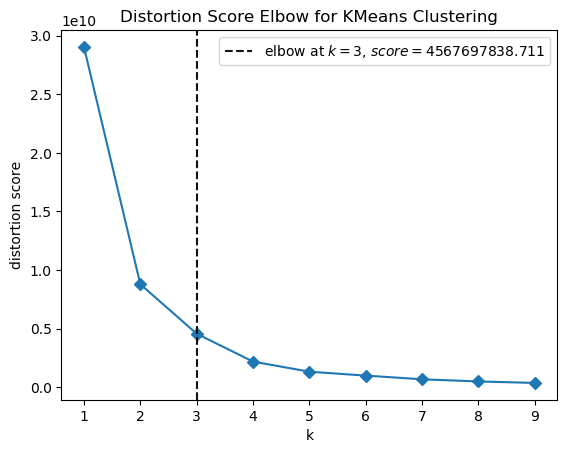

In [209]:
# Feature upon which our clustering is based
median_income_clustering=medianzip_cluster0[['Median Income']]

# Instantiate the clustering model and visualizer
# k is range of number of clusters.
model = KMeans(random_state=2)
visualizer = KElbowVisualizer(model, k=(1,10),  timings=False)

# Fit the data to the visualizer and render the figure
visualizer.fit(median_income_clustering)        
visualizer.show()   

In [210]:
K_clusters_=4  

kmeans2=KMeans(n_clusters=K_clusters_, random_state=0).fit(median_income_clustering)

kmeans2.labels_

array([2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 1, 3, 3, 1, 3, 3, 0, 3, 1, 3, 1, 3,
       3, 1, 3, 2, 0, 0, 1, 0, 3, 1, 3, 2, 2, 1, 3, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

<br>
<br>
These labels can be added to the medianzip_cluster2 dataframe, which will later be combined with our cluster2_df through an inner join. This dataframe will have 116 rows again. From here, we are ready to isolate the neighborhoods belonging to the same cluster as the New York Upper East Side.  

In [213]:
medianzip_cluster0.insert(4,'Income Group',kmeans2.labels_)
medianzip_cluster0.drop(['Mean Income','Pop'],axis=1, inplace=True)

In [214]:
Final_clusters=cluster0_df.join(medianzip_cluster0.set_index(['Postal Code']), how='inner',on='Postal Code').reset_index(drop=True)

In [215]:
Final_clusters

Neighborhood   Latitude   Longitude  Cluster  \
0               New York - Upper East Side  40.775639  -73.960508      0.0   
1                   Chicago - Printers Row  41.873820  -87.629121      0.0   
2                Chicago - Near South Side  41.860800  -87.625720      0.0   
3             Chicago - Sheffield & DePaul  41.927175  -87.653643      0.0   
4                   Chicago - Lincoln Park  41.925470  -87.648778      0.0   
5                 Chicago - North Lawndale  41.858978  -87.715202      0.0   
6                    Chicago - Avalon Park  41.744202  -87.585576      0.0   
7                      Chicago - East Side  41.707994  -87.535173      0.0   
8                       Chicago - Avondale  41.941501  -87.702502      0.0   
9                    Chicago - Irving Park  41.953822  -87.719287      0.0   
10                  Chicago - North Center  41.946745  -87.688257      0.0   
11                  Chicago - Logan Square  41.923060  -87.709291      0.0   
12                      Chicago - Bucktown  41.922707  -87.680275      0.0   
13                   Chicago - Wicker Park  41.910489  -87.677567      0.0   
14                Chicago - Garfield Ridge  41.792720  -87.762310      0.0   
15                      Chicago - Clearing  41.777964  -87.769056      0.0   
16               Chicago - Mount Greenwood  41.691590  -87.700805      0.0   
17                          Chicago - Loop  41.878635  -87.625055      0.0   
18                     Chicago - Greektown  41.878564  -87.647050      0.0   
19                     Chicago - Edgewater  41.983685  -87.660114      0.0   
20                     Chicago - Lake View  41.939781  -87.658927      0.0   
21                      Chicago - Boystown  41.943998  -87.647385      0.0   
22              Chicago - Magnificent Mile  41.894809  -87.624214      0.0   
23                 Chicago - Streeterville  41.892736  -87.620042      0.0   
24                Chicago - Lincoln Square  41.968682  -87.688965      0.0   
25                     Chicago - West Loop  41.885441  -87.662734      0.0   
26             Chicago - Little Italy, UIC  41.869540  -87.651133      0.0   
27                 Chicago - Andersonville  41.981658  -87.668476      0.0   
28                        Chicago - Uptown  41.966540  -87.653340      0.0   
29                      Chicago - Woodlawn  41.780580  -87.591535      0.0   
30                     Chicago - Hyde Park  41.794767  -87.591675      0.0   
31                  Chicago - Portage Park  41.953217  -87.764558      0.0   
32               Chicago - Rush & Division  41.899777  -87.628430      0.0   
33                    Chicago - Gold Coast  41.906699  -87.625331      0.0   
34                Chicago - Jefferson Park  41.982504  -87.770400      0.0   
35                       Chicago - Dunning  41.945260  -87.807000      0.0   
36                Chicago - Millenium Park  41.882552  -87.622551      0.0   
37                       Chicago - Beverly  41.717120  -87.676180      0.0   
38                   Chicago - Edison Park  42.003519  -87.817149      0.0   
39                  Chicago - Wrigleyville  41.949062  -87.656516      0.0   
40                  Chicago - East Village  41.899811  -87.672294      0.0   
41             Chicago - Ukrainian Village  41.899413  -87.684485      0.0   
42                    Chicago - Bridgeport  41.836416  -87.648661      0.0   
43                     Chicago - Montclare  41.929382  -87.798160      0.0   
44                        Chicago - Austin  41.894871  -87.765401      0.0   
45                   Chicago - River North  41.892385  -87.634075      0.0   
46          San Francisco - Inner Richmond  37.780954 -122.467256      0.0   
47        San Francisco - Presidio Heights  37.788913 -122.453801      0.0   
48         San Francisco - Laurel Heights   37.785021 -122.450970      0.0   
49           San Francisco - Lone Mountain  37.777005 -122.453801      0.0   
50            San Francisco -  Jordan Park  37.78327

<br>
<br>
Let's now explore our final selection of neighborhoods, which will be visualized with a red color in our chorpleth maps at the end.

In [216]:
Final_clusters=Final_clusters.loc[Final_clusters['Income Group']==2,:].reset_index(drop=True)
Final_clusters

Neighborhood   Latitude   Longitude  Cluster  \
0            New York - Upper East Side  40.775639  -73.960508      0.0   
1              Chicago - Millenium Park  41.882552  -87.622551      0.0   
2                 Chicago - River North  41.892385  -87.634075      0.0   
3            San Francisco - Cow Hollow  37.798033 -122.439646      0.0   
4          San Francisco - Union Street  37.797725 -122.430581      0.0   
5                San Francisco - Marina  37.803667 -122.436815      0.0   
6             San Francisco - Downtown   37.794574 -122.399945      0.0   
7   San Francisco - Northern Waterfront  37.800248 -122.401110      0.0   
8    San Francisco - Financial District  37.794574 -122.399945      0.0   
9       San Francisco - Duboce Triangle  37.767679 -122.431860      0.0   
10      San Francisco - Mission Dolores  37.764387 -122.426897      0.0   
11               San Francisco - Castro  37.760908 -122.435004      0.0   
12      San Francisco - Dolores Heights  37.757311 -122.433166      0.0   
13           San Francisco - Noe Valley  37.750238 -122.433703      0.0   
14          San Francisco - Rincon Hill  37.787296 -122.391921      0.0   
15      San Francisco - South of Market  37.778519 -122.405640      0.0   
16         San Francisco - Potrero Hill  37.760493 -122.400869      0.0   
17             San Francisco - Dogpatch  37.759122 -122.389538      0.0   
18   San Francisco - Central Waterfront  37.755439 -122.387096      0.0   
19          San Francisco - West Portal  37.741678 -122.467954      0.0   
20   San Francisco - Westwood Highlands  37.733250 -122.456632      0.0   
21     San Francisco - St. Francis Wood  37.737784 -122.465123      0.0   
22      San Francisco - Diamond Heights  37.742372 -122.442477      0.0   
23            San Francisco - Fairmount  37.738926 -122.426513      0.0   
24            San Francisco - Glen Park  37.737772 -122.432104      0.0   

     1st Most Common Venue    2nd Most Common Venue  \
0       Italian Restaurant                  Exhibit   
1                    Hotel              Coffee Shop   
2               Steakhouse       Italian Restaurant   
3       Italian Restaurant     Gym / Fitness Center   
4           Cosmetics Shop                      Spa   
5     Gym / Fitness Center              Pizza Place   
6              Coffee Shop                      Gym   
7               Food Truck                     Café   
8              Coffee Shop                      Gym   
9              Coffee Shop             Liquor Store   
10            Cocktail Bar              Pizza Place   
11                 Gay Bar              Coffee Shop   
12                 Gay Bar          Thai Restaurant   
13               Gift Shop              Coffee Shop   
14             Coffee Shop                     Café   
15             Coffee Shop    Vietnamese Restaurant   
16           Grocery Store                     Café   
17    Gym / Fitness Center                     Café   
18             Art Gallery                     Park   
19             Coffee Shop       Italian Restaurant   
20             Yoga Studio                  Dog Run   
21                     Pub              Coffee Shop   
22           Grocery Store              Coffee Shop   
23                  Bakery              Pizza Place   
24             Coffee Shop                    Trail   

        3rd Most Common Venue      4th Most Common Venue  \
0                 Coffee Shop                     Bakery   
1         American Restaurant                   Pharmacy   
2     New American Restaurant                        Bar   
3                    Wine Bar          French Restaurant   
4         American Restaurant                       Park   
5                  Food Truck           Sushi Restaurant   
6     New American Restaurant                Men's Store   
7         American Restaurant                      Trail   
8     New American Restaurant                Men's Store   
9            Sushi Restaurant              Gr

<br>
<br>
It is notable that only 2 neighborhoods in Chicago fulfill our requirements, while 22 do in San Francisco. However, the neighborhoods in San Francisco are much smaller in terms of area, as many of them share the same postal code. This is also visible on our final choropleth maps. <br>
<br>

Again, highly popular venues are Coffee Shops, Bars and Wine Bars, Gyms, Parks, and Restaurants.


In our choropleth map, we will be coloring the areas based on suitability, from unsuitable (label=5), to culturally similar (label=10), to culturally and economically similar (label=15). Culturally and economically similar locations are optimal and will be colored in red. A choropleth map requires a GeoJSON file.

Creating a choropleth map requires us to first make a dataframe with our neighborhoods and their assigned label for Chicago and San Francisco respectively, and then mapping those with the help of a 'key' in our GeoJSON file which contains the boundaries and shapes of each neighborhood. The key will be the neighborhood name and can be found under 'features.properties.pri_neigh' in the GeoJSON file for the Chicago neighborhoods and under 'features.properties.name' in the GeoJSON file of our San Francisco neighborhoods. 

Let's start adding a new column, 'Label', to our Chicago_df. 

In [217]:
Chicago_df['Label']=5

In [219]:
Chicago_df.loc[Chicago_df['Neighborhood'].isin(cluster0_df['Neighborhood']), 'Label']=10

In [220]:
Chicago_df.loc[Chicago_df['Neighborhood'].isin(Final_clusters['Neighborhood']),'Label']=15

In [221]:
Chicago_df['Neighborhood']=Chicago_neighborhoods_df['Neighborhood']
Chicago_df

Neighborhood  Label
0         Grand Boulevard      5
1            Printers Row     10
2           United Center      5
3      Sheffield & DePaul     10
4           Humboldt Park      5
5           Garfield Park      5
6          North Lawndale     10
7          Little Village      5
8           Armour Square      5
9             Avalon Park     10
10               Burnside      5
11                Hermosa      5
12               Avondale     10
13           Logan Square     10
14        Calumet Heights      5
15              East Side     10
16           West Pullman      5
17         Garfield Ridge     10
18               New City      5
19              Englewood      5
20         Grand Crossing      5
21                Ashburn      5
22        Mount Greenwood     10
23            Morgan Park      5
24                 O'Hare      5
25           Jackson Park      5
26                   Loop     10
27                Pullman      5
28              Riverdale      5
29              Hegewisch      5
30              Greektown     10
31                Douglas      5
32          Museum Campus      5
33              Edgewater     10
34              Lake View     10
35           Lincoln Park     10
36       Magnificent Mile     10
37         Lincoln Square     10
38                Oakland      5
39             Grant Park      5
40              West Loop     10
41            Fuller Park      5
42          Andersonville     10
43               Woodlawn     10
44           Portage Park     10
45        Rush & Division     10
46      Little Italy, UIC     10
47                Kenwood      5
48            Rogers Park      5
49         Jefferson Park     10
50  Sauganash,Forest Glen      5
51             North Park      5
52            Albany Park      5
53            Irving Park     10
54                Dunning     10
55             West Ridge      5
56                 Uptown     10
57           Norwood Park      5
58          Streeterville     10
59            South Shore      5
60                Chatham      5
61          South Chicago      5
62               Roseland      5
63           North Center     10
64          South Deering      5
65        Washington Park      5
66         Millenium Park     15
67        Near South Side     10
68              Chinatown      5
69           Chicago Lawn      5
70         Auburn Gresham      5
71                Beverly     10
72     Washington Heights      5
73            Edison Park     10
74              Hyde Park     10
75               Bucktown     10
76        Lower West Side      5
77           Wrigleyville     10
78         Archer Heights      5
79          Brighton Park      5
80          Mckinley Park      5
81           East Village     10
82              West Town      5
83             Bridgeport     10
84            West Elsdon      5
85              Gage Park      5
86               Clearing     10
87              West Lawn      5
88            Wicker Park     10
89      Ukrainian Village     10
90               Galewood      5
91              Montclare     10
92               Old Town      5
93         Belmont Cragin      5
94                 Austin     10
95             Gold Coast     10
96               Boystown     10
97            River North     15

<br>
<br>
We are now ready to display the map of Chicago. Again, the red areas are where the restaurant owner should look for locations in Chicago. Click on the black circles to find out the name of each neighborhood. 

In [222]:
map_chicago=folium.Map(location=Chicago_coordinates, zoom_start=11)


#Add Markers to the Map
map_chicago.choropleth(
    geo_data=chicago_boundaries,
    data=Chicago_df,
    columns=['Neighborhood','Label'],
    key_on='properties.pri_neigh',
    #threshold_scale=threshold_scale,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Restaurant Location',
    reset=True)

for label, lat, lng in zip(Chicago_latlng['Neighborhood'],Chicago_latlng['Latitude'],Chicago_latlng['Longitude']):
    label=folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
    [lat,lng],
    radius=1,
    popup=label,
    color='black',
    fill_color='black',
    fill_opacity=0.6).add_to(map_chicago)

map_chicago



<br>
<br>
Let's now create our map for San Francisco. This requires a tad more work, given that we have analyzed and labeled each San Francisco neighborhood independently (as required by our Google Maps API to get the coordinates), even though some of them were combined in the initial CSV and in our GeoJSON file. <br>
<br>
Eventually, we must map the neighborhood cells on our SanFrancisco_neighborhoods_df with the key on the San Francisco GeoJSON file. If any of the neighborhoods that were combined belongs to a particular cluster, we will color both, as they are represented by one shape only.

In [228]:
SanFrancisco_neighborhoods_df['Label']=5
SanFrancisco_neighborhoods_split=SanFrancisco_neighborhoods_df.copy()
SanFrancisco_neighborhoods_split2=SanFrancisco_neighborhoods_df.copy()
cluster0_split=cluster0_df.copy()

#We delete the prefix 'San Francisco -' to compare it with our SanFrancisco_neighborhoods_df, which does not have the prefix.
for index in range(0,len(cluster0_split)):
    cluster0_split.iloc[index,0]= cluster0_split.iloc[index,0].split('-')[-1].strip() 


#Since the SanFrancisco_neighborhoods_df has some neighborhoods combined, we cannot directly compare it with the cluster2_df. We must split the values and then compare each individually.
for index in range(0,len(SanFrancisco_neighborhoods_df)):
    content=SanFrancisco_neighborhoods_split.iloc[index,0].split('/')[-1].strip()
    print(content)
    if content in cluster0_split['Neighborhood'].unique():
        SanFrancisco_neighborhoods_df.iloc[index,1]=10
    
    content2=SanFrancisco_neighborhoods_split2.iloc[index,0].split('/')[0].strip()
    print(content2)
    if content2 in cluster0_split['Neighborhood'].unique():
        SanFrancisco_neighborhoods_df.iloc[index,1]=10
        
SanFrancisco_neighborhoods_df 

Seacliff
Seacliff
Lake Street
Lake Street
Presidio National Park
Presidio National Park
Presidio Terrace
Presidio Terrace
Inner Richmond
Inner Richmond
Sutro Heights
Sutro Heights
Ft. Miley
Lincoln Park
Outer Richmond
Outer Richmond
Golden Gate Park
Golden Gate Park
Presidio Heights
Presidio Heights
Jordan Park
Laurel Heights
Lone Mountain
Lone Mountain
Anza Vista
Anza Vista
Cow Hollow
Cow Hollow
Union Street
Union Street
Nob Hill
Nob Hill
Marina
Marina
Telegraph Hill
Telegraph Hill
Union Square
Downtown
Tenderloin
Tenderloin
Civic Center
Civic Center
Hayes Valley
Hayes Valley
Alamo Square
Alamo Square
Panhandle
Panhandle
Haight Ashbury
Haight Ashbury
Lower Haight
Lower Haight
Mint Hill
Mint Hill
Duboce Triangle
Duboce Triangle
Cole Valley
Cole Valley
Rincon Hill
Rincon Hill
South Beach
South Beach
South of Market
South of Market
Showplace Square
Showplace Square
Mission Bay
Mission Bay
Yerba Buena Island
Yerba Buena Island
Treasure Island
Treasure Island
Mission Dolores
Mission Dolore

Neighborhood  Label
0                        Seacliff      5
1                     Lake Street      5
2          Presidio National Park      5
3                Presidio Terrace      5
4                  Inner Richmond     10
5                   Sutro Heights      5
6        Lincoln Park / Ft. Miley     10
7                  Outer Richmond     10
8                Golden Gate Park      5
9                Presidio Heights     10
10   Laurel Heights / Jordan Park     10
11                  Lone Mountain     10
12                     Anza Vista     10
13                     Cow Hollow     10
14                   Union Street     10
15                       Nob Hill     10
16                         Marina     10
17                 Telegraph Hill     10
18        Downtown / Union Square     10
19                     Tenderloin     10
20                   Civic Center     10
21                   Hayes Valley     10
22                   Alamo Square     10
23                      Panhandle     10
24                 Haight Ashbury     10
25                   Lower Haight     10
26                      Mint Hill     10
27                Duboce Triangle     10
28                    Cole Valley     10
29                    Rincon Hill     10
30                    South Beach     10
31                South of Market     10
32               Showplace Square     10
33                    Mission Bay      5
34             Yerba Buena Island      5
35                Treasure Island      5
36                Mission Dolores     10
37                         Castro     10
38                   Outer Sunset      5
39                       Parkside      5
40                     Stonestown     10
41                     Parkmerced      5
42                      Lakeshore      5
43            Golden Gate Heights      5
44                    Forest Hill      5
45                    West Portal     10
46              Clarendon Heights      5
47                Midtown Terrace      5
48                   Laguna Honda      5
49                 Lower Nob Hill     10
50                   Upper Market      5
51                Dolores Heights     10
52                        Mission     10
53                   Potrero Hill     10
54                       Dogpatch     10
55             Central Waterfront     10
56                Diamond Heights     10
57                 Crocker Amazon      5
58                      Fairmount     10
59                Peralta Heights      5
60                     Holly Park     10
61                   Merced Manor      5
62                 Balboa Terrace      5
63                      Ingleside     10
64                 Merced Heights      5
65                  Outer Mission     10
66             Ingleside Terraces     10
67             Mt. Davidson Manor      5
68               Monterey Heights      5
69             Westwood Highlands     10
70                  Westwood Park     10
71                  Miraloma Park      5
72                   McLaren Park      5
73                      Sunnydale     10
74              Visitacion Valley      5
75                    India Basin      5
76            Northern Waterfront     10
77                  Hunters Point      5
78          Candlestick Point SRA      5
79                         Cayuga     10
80                      Oceanview     10
81                   Apparel City      5
82                 Bernal Heights     10
83                     Noe Valley     10
84                 Produce Market     10
85                        Bayview      5
86                 Silver Terrace     10
87                     Bret Harte      5
88               Little Hollywood     10
89                      Excelsior      5
90                        Portola      5
91               University Mound      5
92                 St. Marys Park      5
93                Mission Terrace      5
94                      Sunnyside     10
95                      Glen Park     10
96               Western Addition     10
97 

In [229]:
SanFrancisco_neighborhoods_split=SanFrancisco_neighborhoods_df.copy()
SanFrancisco_neighborhoods_split2=SanFrancisco_neighborhoods_df.copy()
final_split=Final_clusters.copy()


#We delete the prefix 'San Francisco -'
for index in range(0,len(final_split)):
    final_split.iloc[index,0]= final_split.iloc[index,0].split('-')[-1].strip()

for index in range(0,len(SanFrancisco_neighborhoods_df)):
    content=SanFrancisco_neighborhoods_split.iloc[index,0].split('/')[-1].strip()
    print(content)
    if content in final_split['Neighborhood'].unique():
        SanFrancisco_neighborhoods_df.iloc[index,1]=15
    
    content2=SanFrancisco_neighborhoods_split2.iloc[index,0].split('/')[0].strip()
    print(content2)
    if content2 in final_split['Neighborhood'].unique():
        SanFrancisco_neighborhoods_df.iloc[index,1]=15
        
SanFrancisco_neighborhoods_df 

Seacliff
Seacliff
Lake Street
Lake Street
Presidio National Park
Presidio National Park
Presidio Terrace
Presidio Terrace
Inner Richmond
Inner Richmond
Sutro Heights
Sutro Heights
Ft. Miley
Lincoln Park
Outer Richmond
Outer Richmond
Golden Gate Park
Golden Gate Park
Presidio Heights
Presidio Heights
Jordan Park
Laurel Heights
Lone Mountain
Lone Mountain
Anza Vista
Anza Vista
Cow Hollow
Cow Hollow
Union Street
Union Street
Nob Hill
Nob Hill
Marina
Marina
Telegraph Hill
Telegraph Hill
Union Square
Downtown
Tenderloin
Tenderloin
Civic Center
Civic Center
Hayes Valley
Hayes Valley
Alamo Square
Alamo Square
Panhandle
Panhandle
Haight Ashbury
Haight Ashbury
Lower Haight
Lower Haight
Mint Hill
Mint Hill
Duboce Triangle
Duboce Triangle
Cole Valley
Cole Valley
Rincon Hill
Rincon Hill
South Beach
South Beach
South of Market
South of Market
Showplace Square
Showplace Square
Mission Bay
Mission Bay
Yerba Buena Island
Yerba Buena Island
Treasure Island
Treasure Island
Mission Dolores
Mission Dolore

Neighborhood  Label
0                        Seacliff      5
1                     Lake Street      5
2          Presidio National Park      5
3                Presidio Terrace      5
4                  Inner Richmond     10
5                   Sutro Heights      5
6        Lincoln Park / Ft. Miley     10
7                  Outer Richmond     10
8                Golden Gate Park      5
9                Presidio Heights     10
10   Laurel Heights / Jordan Park     10
11                  Lone Mountain     10
12                     Anza Vista     10
13                     Cow Hollow     15
14                   Union Street     15
15                       Nob Hill     10
16                         Marina     15
17                 Telegraph Hill     10
18        Downtown / Union Square     15
19                     Tenderloin     10
20                   Civic Center     10
21                   Hayes Valley     10
22                   Alamo Square     10
23                      Panhandle     10
24                 Haight Ashbury     10
25                   Lower Haight     10
26                      Mint Hill     10
27                Duboce Triangle     15
28                    Cole Valley     10
29                    Rincon Hill     15
30                    South Beach     10
31                South of Market     15
32               Showplace Square     10
33                    Mission Bay      5
34             Yerba Buena Island      5
35                Treasure Island      5
36                Mission Dolores     15
37                         Castro     15
38                   Outer Sunset      5
39                       Parkside      5
40                     Stonestown     10
41                     Parkmerced      5
42                      Lakeshore      5
43            Golden Gate Heights      5
44                    Forest Hill      5
45                    West Portal     15
46              Clarendon Heights      5
47                Midtown Terrace      5
48                   Laguna Honda      5
49                 Lower Nob Hill     10
50                   Upper Market      5
51                Dolores Heights     15
52                        Mission     10
53                   Potrero Hill     15
54                       Dogpatch     15
55             Central Waterfront     15
56                Diamond Heights     15
57                 Crocker Amazon      5
58                      Fairmount     15
59                Peralta Heights      5
60                     Holly Park     10
61                   Merced Manor      5
62                 Balboa Terrace      5
63                      Ingleside     10
64                 Merced Heights      5
65                  Outer Mission     10
66             Ingleside Terraces     10
67             Mt. Davidson Manor      5
68               Monterey Heights      5
69             Westwood Highlands     15
70                  Westwood Park     10
71                  Miraloma Park      5
72                   McLaren Park      5
73                      Sunnydale     10
74              Visitacion Valley      5
75                    India Basin      5
76            Northern Waterfront     15
77                  Hunters Point      5
78          Candlestick Point SRA      5
79                         Cayuga     10
80                      Oceanview     10
81                   Apparel City      5
82                 Bernal Heights     10
83                     Noe Valley     15
84                 Produce Market     10
85                        Bayview      5
86                 Silver Terrace     10
87                     Bret Harte      5
88               Little Hollywood     10
89                      Excelsior      5
90                        Portola      5
91               University Mound      5
92                 St. Marys Park      5
93                Mission Terrace      5
94                      Sunnyside     10
95                      Glen Park     15
96               Western Addition     10
97 

<br>
<br>
We are now ready to map the San Francisco neighborhoods along with their label. 

In [232]:
map_sanfran=folium.Map(location=SanFrancisco_coordinates, zoom_start=12)


#Add Markers to the Map
map_sanfran.choropleth(
    geo_data=sf_boundaries,
    data=SanFrancisco_neighborhoods_df,
    columns=['Neighborhood','Label'],
    key_on='properties.name',
    #threshold_scale=threshold_scale,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Restaurant Location',
    reset=True)

for label, lat, lng in zip(SanFrancisco_latlng['Neighborhood'],SanFrancisco_latlng['Latitude'],SanFrancisco_latlng['Longitude']):
    label=folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
    [lat,lng],
    radius=1,
    popup=label,
    color='black',
    fill_color='black',
    fill_opacity=0.6).add_to(map_sanfran)

map_sanfran




Again, the red neighborhoods are the optimal neighborhoods for the restaurant owner to check for locations in San Francisco. 

<br>
<br>
<h3>4. Results <h3>
<hr>

Again, here are the results of our clustering model:

In [231]:
Final_clusters

Neighborhood   Latitude   Longitude  Cluster  \
0            New York - Upper East Side  40.775639  -73.960508      0.0   
1              Chicago - Millenium Park  41.882552  -87.622551      0.0   
2                 Chicago - River North  41.892385  -87.634075      0.0   
3            San Francisco - Cow Hollow  37.798033 -122.439646      0.0   
4          San Francisco - Union Street  37.797725 -122.430581      0.0   
5                San Francisco - Marina  37.803667 -122.436815      0.0   
6             San Francisco - Downtown   37.794574 -122.399945      0.0   
7   San Francisco - Northern Waterfront  37.800248 -122.401110      0.0   
8    San Francisco - Financial District  37.794574 -122.399945      0.0   
9       San Francisco - Duboce Triangle  37.767679 -122.431860      0.0   
10      San Francisco - Mission Dolores  37.764387 -122.426897      0.0   
11               San Francisco - Castro  37.760908 -122.435004      0.0   
12      San Francisco - Dolores Heights  37.757311 -122.433166      0.0   
13           San Francisco - Noe Valley  37.750238 -122.433703      0.0   
14          San Francisco - Rincon Hill  37.787296 -122.391921      0.0   
15      San Francisco - South of Market  37.778519 -122.405640      0.0   
16         San Francisco - Potrero Hill  37.760493 -122.400869      0.0   
17             San Francisco - Dogpatch  37.759122 -122.389538      0.0   
18   San Francisco - Central Waterfront  37.755439 -122.387096      0.0   
19          San Francisco - West Portal  37.741678 -122.467954      0.0   
20   San Francisco - Westwood Highlands  37.733250 -122.456632      0.0   
21     San Francisco - St. Francis Wood  37.737784 -122.465123      0.0   
22      San Francisco - Diamond Heights  37.742372 -122.442477      0.0   
23            San Francisco - Fairmount  37.738926 -122.426513      0.0   
24            San Francisco - Glen Park  37.737772 -122.432104      0.0   

     1st Most Common Venue    2nd Most Common Venue  \
0       Italian Restaurant                  Exhibit   
1                    Hotel              Coffee Shop   
2               Steakhouse       Italian Restaurant   
3       Italian Restaurant     Gym / Fitness Center   
4           Cosmetics Shop                      Spa   
5     Gym / Fitness Center              Pizza Place   
6              Coffee Shop                      Gym   
7               Food Truck                     Café   
8              Coffee Shop                      Gym   
9              Coffee Shop             Liquor Store   
10            Cocktail Bar              Pizza Place   
11                 Gay Bar              Coffee Shop   
12                 Gay Bar          Thai Restaurant   
13               Gift Shop              Coffee Shop   
14             Coffee Shop                     Café   
15             Coffee Shop    Vietnamese Restaurant   
16           Grocery Store                     Café   
17    Gym / Fitness Center                     Café   
18             Art Gallery                     Park   
19             Coffee Shop       Italian Restaurant   
20             Yoga Studio                  Dog Run   
21                     Pub              Coffee Shop   
22           Grocery Store              Coffee Shop   
23                  Bakery              Pizza Place   
24             Coffee Shop                    Trail   

        3rd Most Common Venue      4th Most Common Venue  \
0                 Coffee Shop                     Bakery   
1         American Restaurant                   Pharmacy   
2     New American Restaurant                        Bar   
3                    Wine Bar          French Restaurant   
4         American Restaurant                       Park   
5                  Food Truck           Sushi Restaurant   
6     New American Restaurant                Men's Store   
7         American Restaurant                      Trail   
8     New American Restaurant                Men's Store   
9            Sushi Restaurant              Gr

In [233]:
print('Our model suggests {} different neighborhoods in {} different postal codes.' .format (
    len(Final_clusters['Postal Code'])-1,    
    len(Final_clusters['Postal Code'].unique())-1
    )
)

Our model suggests 24 different neighborhoods in 9 different postal codes.


<br>
<br>
Let's cumulate the mean frequencies of our different venue categories in our final cluster and extract the top 15 values. This will give us a good overview of what kind of venues we can expect in our cluster.<br>
<br>
This method of computing the cumulative mean frequencies of venue categories is preferred over summing their absolute frequencies, given that we have a different number of venues extracted from each neighborhood. This way, we prevent that only the most popular neighborhoods with close to 100 venues dominate the results. Each of our neighborhood is weighted equally, giving us a good approximation of what we can expect when visiting each of them. 

In [236]:
venues_final_cluster_grouped=venues_grouped.loc[venues_grouped['Neighborhood'].isin(Final_clusters['Neighborhood']),:]

In [261]:
Top15_Final=venues_final_cluster_grouped.drop('Neighborhood', axis=1).reset_index(drop=True)
Top15_Final=Top15_Final.sum(axis=0)
Top15_Final=pd.DataFrame(Top15_Final).sort_values(by=0,ascending=False)
Top15_Final.reset_index(inplace=True)
Top15_Final.columns=['Venue Category','Cumulative Mean Frequency']
Top15_Final=Top15_Final.iloc[0:15,:]
Top15_Final

Venue Category  Cumulative Mean Frequency
0              Coffee Shop                   1.236849
1       Italian Restaurant                   0.673814
2     Gym / Fitness Center                   0.631330
3                     Café                   0.619749
4              Pizza Place                   0.530455
5                     Park                   0.494391
6         Sushi Restaurant                   0.487493
7                   Bakery                   0.482070
8       Mexican Restaurant                   0.466830
9                 Wine Bar                   0.440334
10                     Gym                   0.438342
11           Grocery Store                   0.429496
12                   Trail                   0.408380
13             Yoga Studio                   0.385018
14          Breakfast Spot                   0.381948

<br>
<br>
Looking at our choropleth maps and our Final_clusters and Top15_Final dataframes, we can see that both of the optimal neighborhoods in Chicago, and most of the optimal neighborhoods in San Francisco are right in the city center. Not only are those areas that appear to have a very high variety of culinary experiences, as Italian, Chinese, Indian, Vietnamese, Thai, Mexican, French, Sushi, American, New American, Japanese, Burger Restaurants are among the Top Venues in this cluster, but also neighborhoods with very high median household income. <br>
<br>
Comparing the picture of New York's Upper East Side to the 24 other Chicago and San Francisco neighborhoods, we can see a lot of similarity in terms of cultural as well as economic variables. As such, the restaurant owner can be confident that these neighborhoods are the most likely in securing that the new restaurants will be a success, just like the Upper East Side venue. 

<br>
<br>
<h3>5. Discussion<h3/>
<hr>

Our final cluster contains neighborhoods in Chicago and San Francico that are similar in terms of cultural and economic variables to New York's Upper East Side. However, as noted previously, most of the suggested neighborhoods are in San Francisco. This, however, cannot be attributed to the fact that there simply aren't as many culturally similar neighborhoods and culinary diverse neighborhoods in Chicago (there certainly are!), but more to the economic variable introduced in our second K-Means clustering, namely median household income. <br>
<br>
Indeed, looking at our cluster0_df, we can see that there are 44 neighborhoods in Chicago which are similar to New York's Upper East Side culturally. This figure only drastically decreases after the introduction of the median household income as input variable for our second clustering. <br>
<br>
Of course, the restaurant owner tries to attract a crowd that has a higher buying power, but the median household income is not an optimal variable for comparing economic well-being across different cities, as the cost of living may vary greatly. San Francisco is known for its high cost of living, and extremely high salaries as technological hub of the world. As such, it features the most expensive real estate market in the United States, along with Manhattan. Chicago, on the other hand, is less expensive, and similarly offers lower salaries. <br>
<br>
This means that the average household living in Chicago's Lincoln Park, Magnificient Mile, or Streeterville, despite having a lower median household income of only \\$85,000 - \\$90,0000, may have more disposable income available to spend on out-of-house dining than the average household in San Francisco's 94111 postal code with a median household income of \\$93,790 or even its 94107 postal code with a median household income of around \$100,000. <br>
<br>
Therefore, the restaurant owner may consider to include the above mentioned Chicago neighborhoods in his consideration of potential restaurant locations, while excluding the relevant San Francisco neighborhoods with the stated postal codes.<br>
<br>
Lastly, it is important to mention that more current (and unfortunately not free) data relating US postal codes to median household income may have affected this analysis. While, generally, we do not expect any of the areas in our final cluster to lose their title as prime location and transform into a neighborhood where an upscale restaurant may not find enough visitors, the process of gentrification has changed the landscape of many major US cities in recent years. There has been a gradual tendency of affluent, younger individuals to move to once lower-income neighborhoods close to the city center, such as Chicago's Wicker Park. In San Francisco, the issue of gentrification is even more pronounced, as the city has been called the most gentrified city in the United States:

https://www.sfgate.com/local/article/San-Francisco-Oakland-most-gentrified-cities-in-US-15389147.php <br>
<br>
While advancing the process of gentrification, upscale restaurants may find such neighborhoods primarily interesting as they may still offer lower rent prices than locations right in long-standing prime locations, along with potentially bringing a certain edge and trendy reputation to the venue. <br>
<br>
Of course, depending on the specific needs of the entrepreneur considering a business expansion, further variables may be of importance. A hotel owner may want a location near the waterfront or close to a park, or a hip bar may want to locate in an area with a younger-than-average median age. All these variables can be easily included into our model to offer a tailored solution.

<h3>6. Conclusion<h3/>
<hr>

Our model has greatly reduced the number of neighborhoods which the entrepreneur should consider for their business expansion. Starting with a total of 219 potential neighborhoods in Chicago and San Francisco, our model reduced this number to a total of 115 neighborhoods after the first K-Means clustering based on cultural similarity, and then further reduced this the number to 24 neighborhoods, after the second K-Means clustering based on the economic variabe of median household income. <br>
<br>
This allows our New York chef to save considerable time and effort when trying to find the optimal neighborhood for their planned business expansion, and focus more on looking at specific properties in the final clusters. Furthermore, it lowers the risk of opening the new restaurant in a location that is not well-suited for the venue and, thus, may lessens its probability of success.<br>
<br>
Altogether, the proposed neighborhoods share similarity with New York's Upper East Side in that they are culinarily highly diverse, feature a high number of popular eateries and bars, and are typically the most affluent in their city.<br>
<br>
However, the entrepreneur may consider investing in updated household income information, as processes such as the accelerated gentrification in recent years may have shifted or expanded the number of neighborhoods where an upscale restaurant may be appropriate and successful. <br>
<br> 
Furthermore, one may note that the cost of living among US cities may vary greatly, and that a household in Chicago with a lower income than a household in San Francisco may still have more disposable income to spend on upscale dining. <br>
<br>
All in all, our model can be applied to find the right location for businesses in a number of industries, including outside the hospitality industry. While restaurants, bars, and hotels may profit significantly from time reduction and the inclusion of valuable objective data in their decision of where to locate their next venture, this also applies to other venue categories that frequently occurred on our list. Such places can include gyms and yoga studios, or cultural spaces such as museums, art galleries, and theatres.  <br>
<br>
